## 1. Import Required Libraries

In [1]:
from pathlib import Path
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Set paths
PROJECT_ROOT = Path().resolve().parent #Path.cwd()
DATA_DIR = PROJECT_ROOT / "data"
COINMETRICS_PATH = DATA_DIR / "Coin Metrics" / "coinmetrics_btc.csv"
POLYMARKET_DIR = DATA_DIR / "Polymarket"

print(f"Project path: {PROJECT_ROOT}")
print(f"Data path: {DATA_DIR}")

Project path: C:\Users\hyuns\workspace\GT-MSA-Spring-2026-Team-09
Data path: C:\Users\hyuns\workspace\GT-MSA-Spring-2026-Team-09\data


## 2. Load Bitcoin Data

In [2]:
# Load Bitcoin data (increase schema inference length)
btc_df = pl.read_csv(
    COINMETRICS_PATH,
    try_parse_dates=True,
    infer_schema_length=10000  # Inspect more rows for schema inference
)

# Dates are already parsed with try_parse_dates=True, just rename column
if "time" in btc_df.columns:
    btc_df = btc_df.rename({"time": "date"})

print(f"Bitcoin data shape: {btc_df.shape}")
print(f"Date range: {btc_df['date'].min()} ~ {btc_df['date'].max()}")
print(f"\nColumn list:")
print(btc_df.columns)

Bitcoin data shape: (6221, 32)
Date range: 2009-01-03 ~ 2026-01-14

Column list:
['date', 'AdrActCnt', 'AdrBalCnt', 'AssetCompletionTime', 'AssetEODCompletionTime', 'BlkCnt', 'CapMVRVCur', 'CapMrktCurUSD', 'CapMrktEstUSD', 'FeeTotNtv', 'FlowInExNtv', 'FlowInExUSD', 'FlowOutExNtv', 'FlowOutExUSD', 'HashRate', 'IssTotNtv', 'IssTotUSD', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'ReferenceRate', 'ReferenceRateETH', 'ReferenceRateEUR', 'ReferenceRateUSD', 'SplyCur', 'SplyExNtv', 'SplyExUSD', 'SplyExpFut10yr', 'TxCnt', 'TxTfrCnt', 'volume_reported_spot_usd_1d']


## 3. Dataset Overview

In [3]:
# Preview data
print("First 5 rows:")
btc_df.head()

First 5 rows:


date,AdrActCnt,AdrBalCnt,AssetCompletionTime,AssetEODCompletionTime,BlkCnt,CapMVRVCur,CapMrktCurUSD,CapMrktEstUSD,FeeTotNtv,FlowInExNtv,FlowInExUSD,FlowOutExNtv,FlowOutExUSD,HashRate,IssTotNtv,IssTotUSD,PriceBTC,PriceUSD,ROI1yr,ROI30d,ReferenceRate,ReferenceRateETH,ReferenceRateEUR,ReferenceRateUSD,SplyCur,SplyExNtv,SplyExUSD,SplyExpFut10yr,TxCnt,TxTfrCnt,volume_reported_spot_usd_1d
date,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64
2009-01-03,0,0,1614334883,1614334883,0,null,null,null,0.0,0.0,null,0.0,null,null,null,null,1,null,null,null,null,null,null,null,0.0,0.0,null,null,0,0,null
2009-01-04,0,0,1614334883,1614334883,0,null,null,null,0.0,0.0,null,0.0,null,null,null,null,1,null,null,null,null,null,null,null,0.0,0.0,null,null,0,0,null
2009-01-05,0,0,1614334883,1614334883,0,null,null,null,0.0,0.0,null,0.0,null,null,null,null,1,null,null,null,null,null,null,null,0.0,0.0,null,null,0,0,null
2009-01-06,0,0,1614334884,1614334884,0,null,null,null,0.0,0.0,null,0.0,null,null,null,null,1,null,null,null,null,null,null,null,0.0,0.0,null,null,0,0,null
2009-01-07,0,0,1614334885,1614334885,0,null,null,null,0.0,0.0,null,0.0,null,null,null,null,1,null,null,null,null,null,null,null,0.0,0.0,null,null,0,0,null


**Analysis Result Interpretation:**
- The first few rows allow you to understand the structure and format of values in the entire dataset
- Bitcoin price and various on-chain metrics are recorded by date

## 4. Check Data Types and Missing Values

In [4]:
# Check data types
print("Data types:")
print(btc_df.dtypes)

# Check for missing values
print("\nNull count:")
null_counts = btc_df.null_count()
print(null_counts)

Data types:
[Date, Int64, Int64, Int64, Int64, Int64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Int64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Int64, Int64, Float64]

Null count:
shape: (1, 32)
┌──────┬───────────┬───────────┬──────────────┬───┬──────────────┬───────┬──────────┬──────────────┐
│ date ┆ AdrActCnt ┆ AdrBalCnt ┆ AssetComplet ┆ … ┆ SplyExpFut10 ┆ TxCnt ┆ TxTfrCnt ┆ volume_repor │
│ ---  ┆ ---       ┆ ---       ┆ ionTime      ┆   ┆ yr           ┆ ---   ┆ ---      ┆ ted_spot_usd │
│ u32  ┆ u32       ┆ u32       ┆ ---          ┆   ┆ ---          ┆ u32   ┆ u32      ┆ _1d          │
│      ┆           ┆           ┆ u32          ┆   ┆ u32          ┆       ┆          ┆ ---          │
│      ┆           ┆           ┆              ┆   ┆              ┆       ┆          ┆ u32          │
╞══════╪═══════════╪═══════════╪══════════════╪═══╪══════════════╪═══════╪══════════

**Analysis Result Interpretation:**
- By checking the data type of each column, you can distinguish between numeric/string/date data
- The number of missing values (nulls) helps evaluate data quality and establish missing value handling strategies if needed
- Columns with many missing values should be excluded from analysis or alternative interpolation methods should be considered

## 5. Statistical Summary

In [5]:
# Technical statistics
btc_df.describe()

statistic,date,AdrActCnt,AdrBalCnt,AssetCompletionTime,AssetEODCompletionTime,BlkCnt,CapMVRVCur,CapMrktCurUSD,CapMrktEstUSD,FeeTotNtv,FlowInExNtv,FlowInExUSD,FlowOutExNtv,FlowOutExUSD,HashRate,IssTotNtv,IssTotUSD,PriceBTC,PriceUSD,ROI1yr,ROI30d,ReferenceRate,ReferenceRateETH,ReferenceRateEUR,ReferenceRateUSD,SplyCur,SplyExNtv,SplyExUSD,SplyExpFut10yr,TxCnt,TxTfrCnt,volume_reported_spot_usd_1d
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""6221""",6220.0,6220.0,6220.0,6220.0,6220.0,5659.0,5659.0,2398.0,6220.0,6220.0,5659.0,6220.0,5659.0,6214.0,6214.0,5659.0,6220.0,5659.0,5294.0,5629.0,7.0,7.0,7.0,7.0,6220.0,6220.0,5659.0,6214.0,6220.0,6220.0,5659.0
"""null_count""","""0""",1.0,1.0,1.0,1.0,1.0,562.0,562.0,3823.0,1.0,1.0,562.0,1.0,562.0,7.0,7.0,562.0,1.0,562.0,927.0,592.0,6214.0,6214.0,6214.0,6214.0,1.0,1.0,562.0,7.0,1.0,1.0,562.0
"""mean""","""2017-07-10 00:00:00""",500905.731672,2.0809e7,1.6364e9,1.6364e9,149.86881,1.989795,3.8264e11,8.6339e11,48.228897,25838.964889,5.0364e8,26577.134164,5.5848e8,1.5146e8,3214.600599,1.5181e7,1.0,19809.987841,559.643271,14.638035,91487.781788,29.161564,78563.321591,91487.781788,1.4197e7,947998.367002,4.0124e10,1.9795e7,208414.228457,497111.757717,5.1167e9
"""std""",null,379439.356736,1.9582e7,4.2202e7,4.2202e7,30.743195,2.493876,5.8737e11,6.3984e11,91.173237,24373.197547,8.1787e8,24692.317635,9.5674e8,2.6345e8,2877.849238,1.7091e7,0.0,29699.078673,1944.97263,55.521166,1711.761816,0.295175,1441.867173,1711.761816,5.7946e6,818157.220356,7.3427e10,1.0372e6,170293.817001,373305.629144,7.5850e9
"""min""","""2009-01-03""",0.0,0.0,1.6143e9,1.6143e9,0.0,0.386829,177670.489754,9.0586e10,0.0,0.0,0.0,0.0,0.0,1.9884e-7,200.0,307.0,1.0,0.050541,-83.730494,-61.668266,90406.142411,28.686314,77790.505193,90406.142411,0.0,0.0,0.0,1.707025e7,0.0,0.0,0.0
"""25%""","""2013-04-07""",60723.0,1.375686e6,1.6143e9,1.6143e9,137.0,1.294308,3.6730e9,3.5528e11,8.210102,9740.165728,8.8193e6,9846.321594,8.5762e6,62.554011,943.75,966516.945821,1.0,260.651331,6.94795,-8.918985,90717.206315,29.145653,78047.851052,90717.206315,1.1005e7,88120.169787,8.9778e7,1.916555e7,47182.0,104349.0,1.0577e7
"""50%""","""2017-07-10""",596940.0,1.8307255e7,1.6143e9,1.6143e9,150.0,1.754254,9.7931e10,6.9935e11,19.542684,21448.642391,1.4120e8,22144.333047,1.4169e8,5.5673e6,1975.0,8.7016e6,1.0,5728.351702,108.712873,3.305785,91096.916155,29.300019,78130.277588,91096.916155,1.6440e7,814911.95839,7.5922e9,2.0192e7,224435.0,557988.0,1.3492e9
"""75%""","""2021-10-12""",817505.0,3.8516093e7,1.6340e9,1.6340e9,162.0,2.256992,5.5492e11,1.2376e12,45.830123,34085.94221,6.5356e8,36447.492482,6.9312e8,1.6529e8,4325.0,2.5843e7,1.0,28844.613678,325.273267,21.554302,91208.956261,29.348301,78167.205866,91208.956261,1.8841e7,1.5339e6,4.2274e10,2.0626e7,312571.0,798101.0,8.1901e9
"""max""","""2026-01-14""",1.366494e6,5.592428e7,1.7684e9,1.7684e9,692.0,146.038332,2.4879e12,2.4875e12,1495.748916,284367.709273,7.2940e9,296550.594117,8.1840e9,1.3055e9,34600.0,7.6710e7,1.0,124824.453667,27666.627786,774.863956,95304.498294,29.48528,81816.258857,95304.498294,1.9975e7,2.8056e6,3.3450e11,2.0826e7,928131.0,2.041653e6,7.4786e10


**Analysis Result Interpretation:**
- **Mean**: Represents the central tendency of each indicator
- **Standard Deviation**: Shows the degree of variability/spread of the data
- **Min/Max**: You can understand the range of data
- **Quartiles (25%, 50%, 75%)**: Helps understand the shape of data distribution
- High volatility in Bitcoin price (high standard deviation) can be confirmed

## 6. Bitcoin Price Visualization

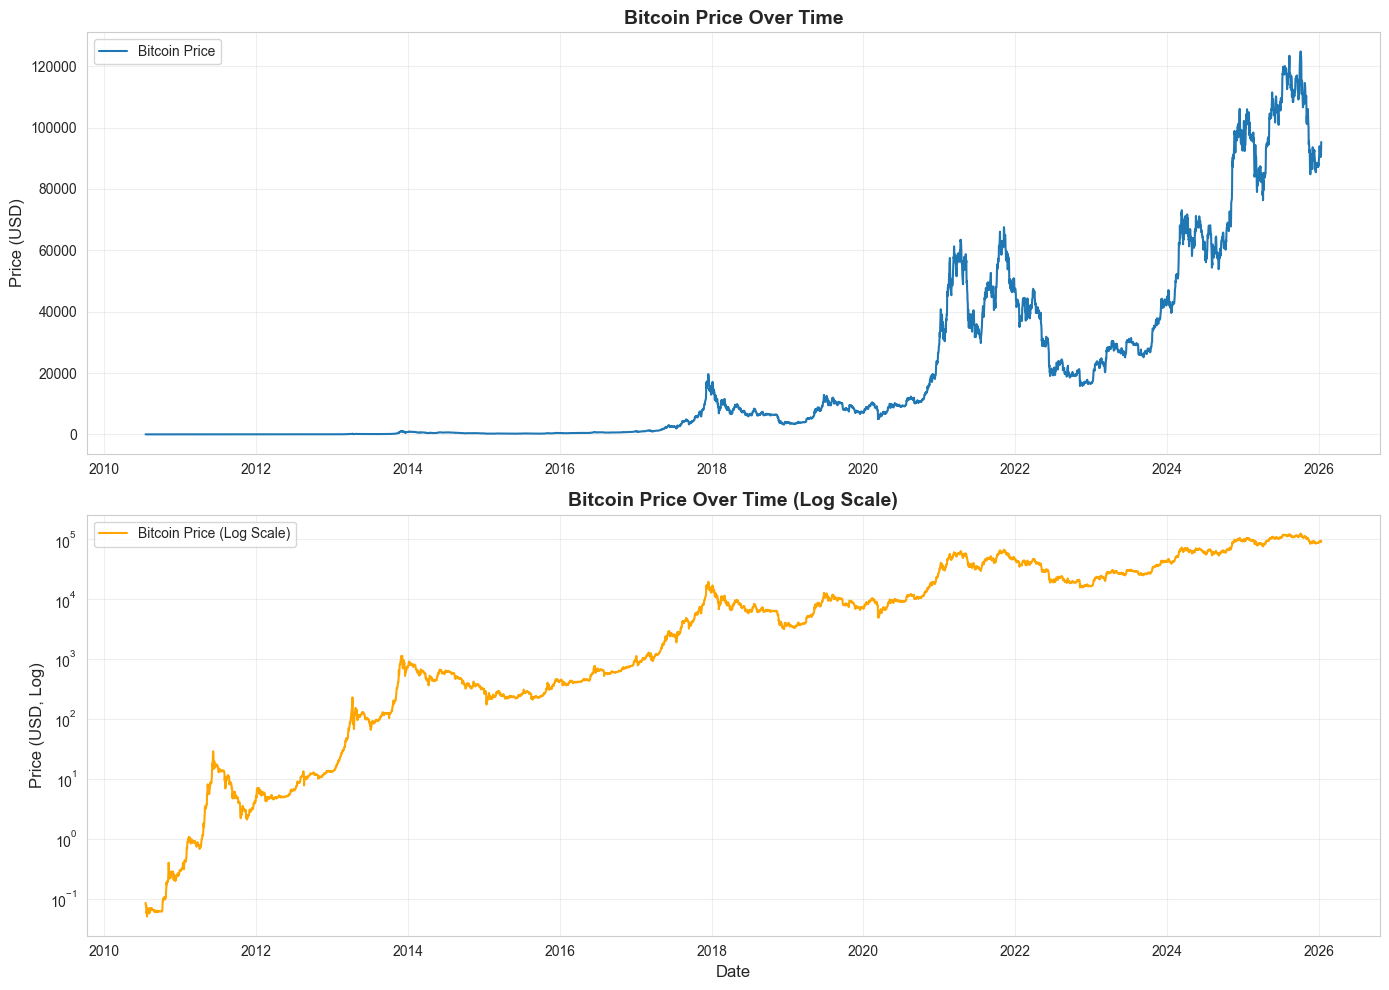

In [6]:
# Bitcoin price time series chart
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Find price column
if 'PriceUSD' in btc_df.columns:
    price_col = 'PriceUSD'
elif 'price' in btc_df.columns:
    price_col = 'price'
else:
    price_col = btc_df.select(pl.col(pl.Float64)).columns[0]

btc_pd = btc_df.to_pandas()
btc_pd.set_index('date', inplace=True)

# Close price trend
axes[0].plot(btc_pd.index, btc_pd[price_col], label='Bitcoin Price', linewidth=1.5)
axes[0].set_title('Bitcoin Price Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price (USD)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Log scale display
axes[1].semilogy(btc_pd.index, btc_pd[price_col], label='Bitcoin Price (Log Scale)', linewidth=1.5, color='orange')
axes[1].set_title('Bitcoin Price Over Time (Log Scale)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Price (USD, Log)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Analysis Result Interpretation:**
- **Linear Scale Chart**: Shows absolute price changes over time
  - Sharp price increases in recent years can be observed
  - Major rise/fall periods can be identified visually
- **Log Scale Chart**: More clearly shows relative percentage changes in price
  - Price volatility in the early low-price period is also well observed
  - Long-term trends are easier to understand by converting exponential growth to linear form
  - Volatility in each period can be compared relatively

## 7. Price Distribution Analysis

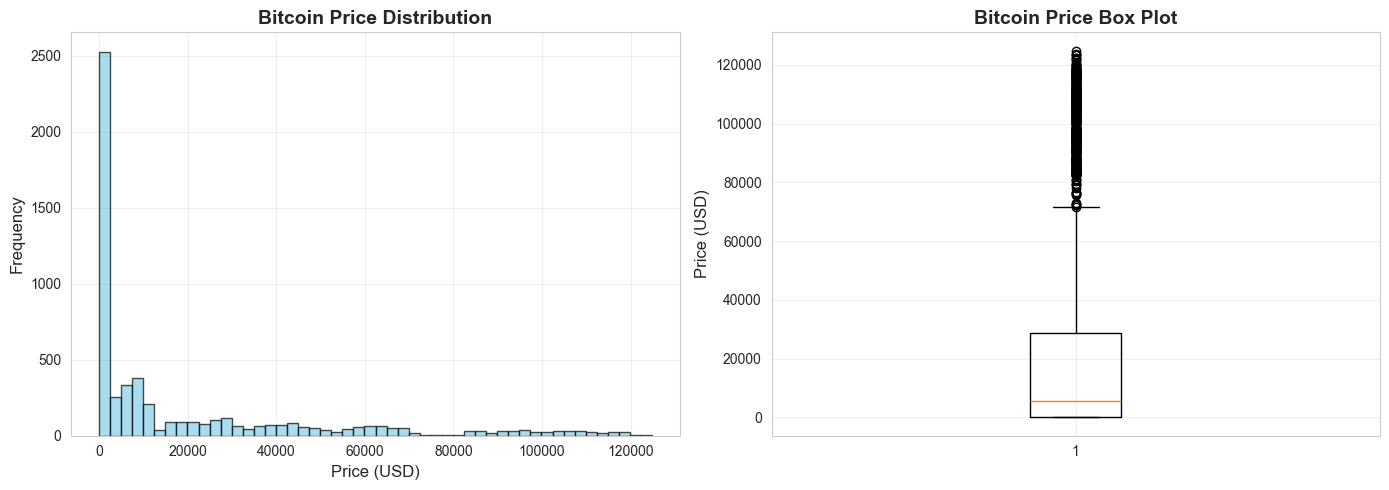

In [7]:
# Visualize price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(btc_pd[price_col].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Bitcoin Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(btc_pd[price_col].dropna(), vert=True)
axes[1].set_title('Bitcoin Price Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price (USD)', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Analysis Result Interpretation:**
- **Histogram**: Shows the shape of price distribution
  - Right-skewed (right-skewed) distribution can be observed
  - Bitcoin price is concentrated in a specific range on most dates
- **Box Plot**: Visualizes outliers, median, and quartiles of distribution
  - Points at the top represent extremely high price periods
  - IQR (Interquartile Range) helps identify the main range of price movement
  - High volatility and existence of extreme values in price can be confirmed
- **Outlier Significance**: Extreme values indicate periods of unusual market activity

## 8. Correlation Analysis

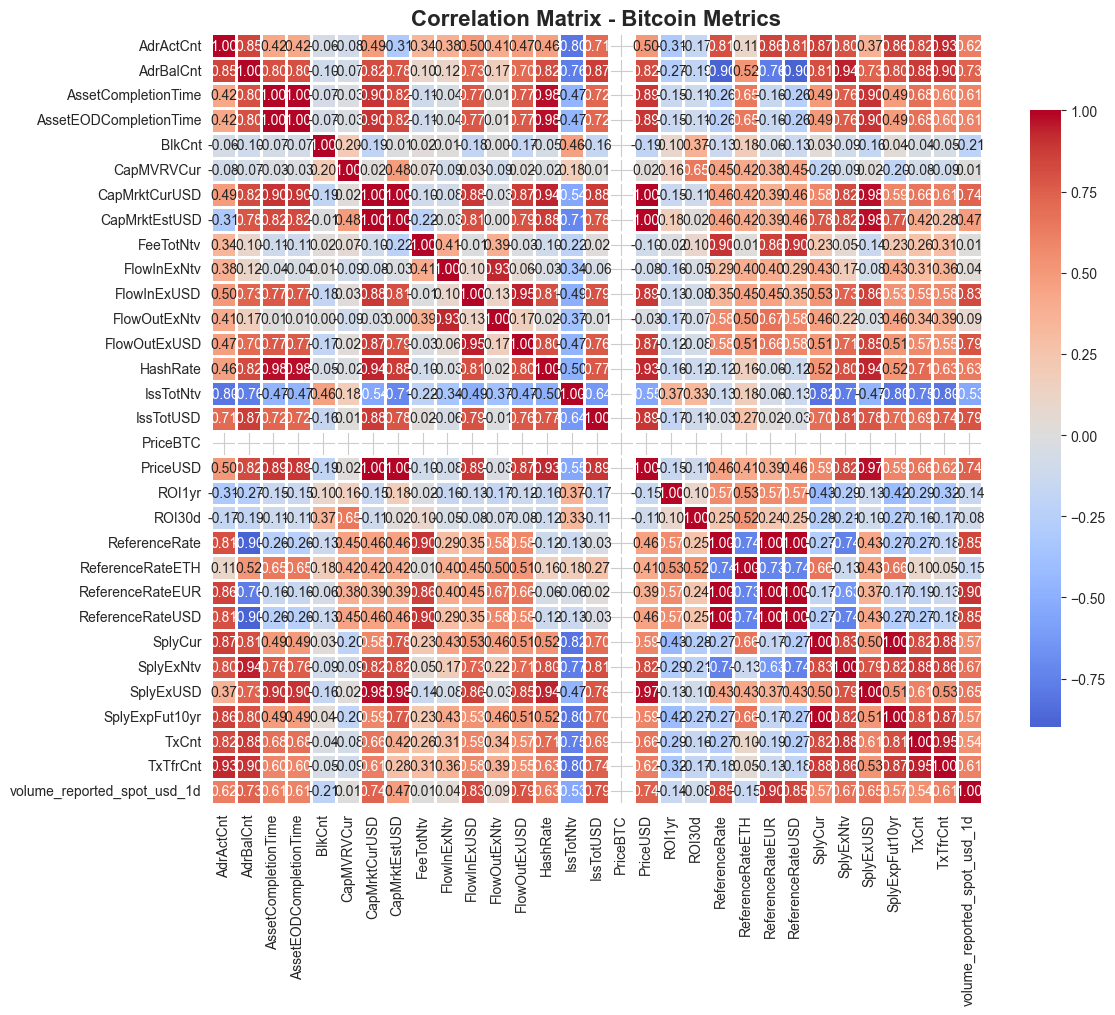

In [8]:
# Select only numeric columns for correlation analysis
numeric_cols = btc_pd.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = btc_pd[numeric_cols].corr()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Bitcoin Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Analysis Result Interpretation:**
- **Correlation Coefficient Interpretation**:
  - **1.0**: Perfect positive correlation (move together)
  - **-1.0**: Perfect negative correlation (move opposite)
  - **0.0**: No correlation
- **Key Insights**:
  - Metrics showing high positive correlation move similarly, so redundancy should be considered
  - Metrics showing negative correlation provide opposite directional information
  - On-chain indicators with strong positive correlation to price can be used in predictive models
  - Some variables can be removed to prevent multicollinearity (multicollinearity) issues

## 9. Returns Analysis

C:\Users\hyuns\AppData\Local\Temp\ipykernel_5268\3408315416.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  btc_pd['daily_return'] = btc_pd[price_col].pct_change() * 100


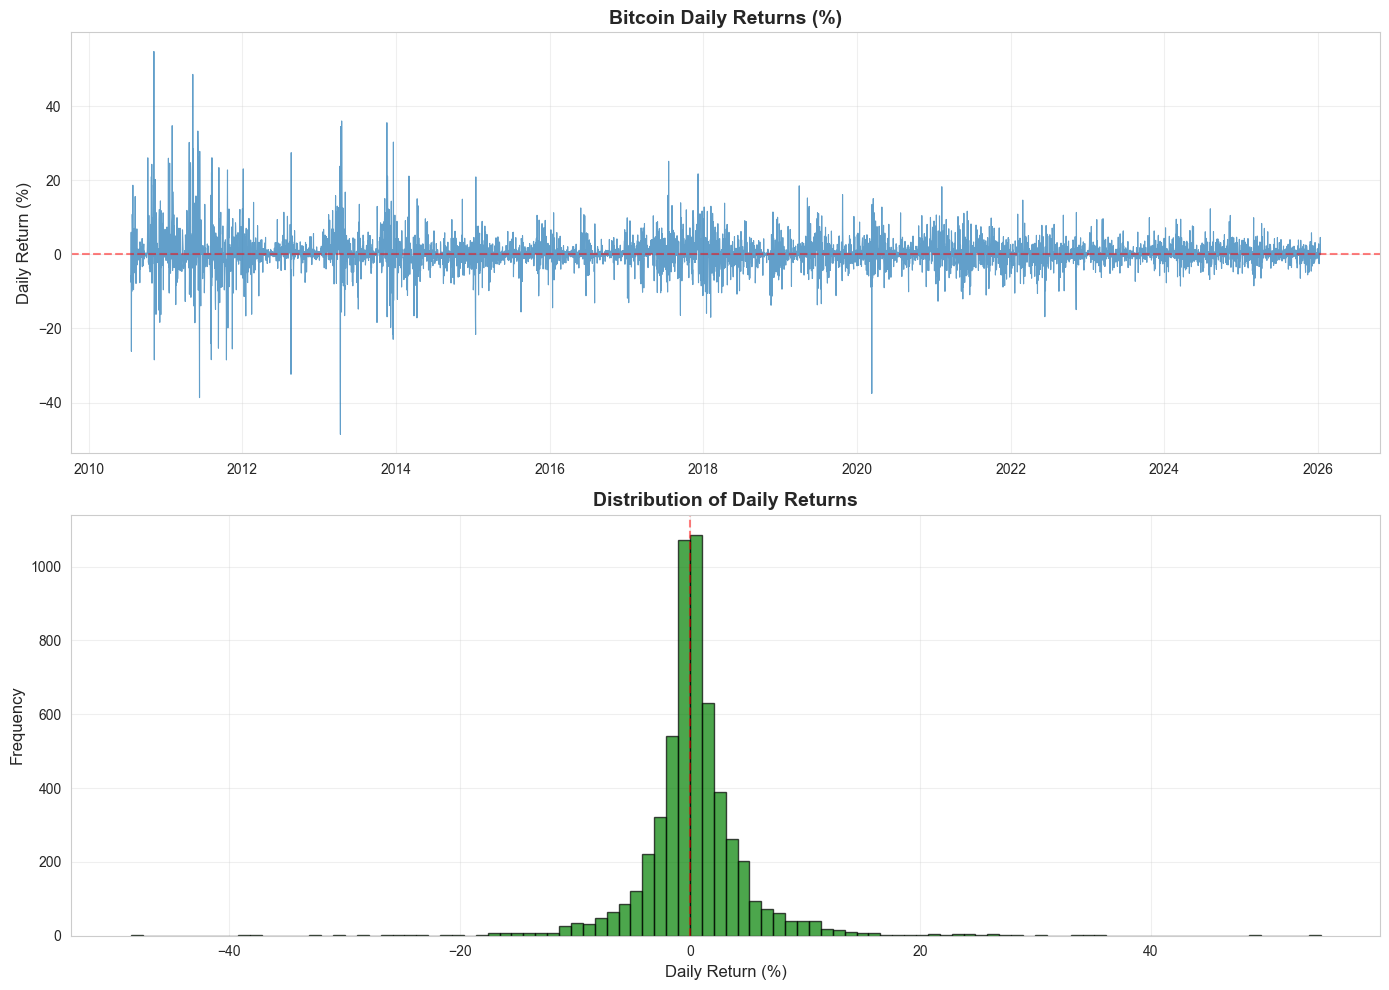


Daily Returns Statistics:
Mean: 0.3574%
Std Dev: 4.7217%
Max: 54.7523%
Min: -48.5699%


In [9]:
# Calculate daily returns
btc_pd['daily_return'] = btc_pd[price_col].pct_change() * 100

# Visualize returns
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Daily returns time series
axes[0].plot(btc_pd.index, btc_pd['daily_return'], linewidth=0.8, alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0].set_title('Bitcoin Daily Returns (%)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Daily Return (%)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Returns distribution
axes[1].hist(btc_pd['daily_return'].dropna(), bins=100, color='green', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Daily Return (%)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].axvline(x=0, color='r', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Returns statistics
print("\nDaily Returns Statistics:")
print(f"Mean: {btc_pd['daily_return'].mean():.4f}%")
print(f"Std Dev: {btc_pd['daily_return'].std():.4f}%")
print(f"Max: {btc_pd['daily_return'].max():.4f}%")
print(f"Min: {btc_pd['daily_return'].min():.4f}%")

**Analysis Result Interpretation:**
- **Daily Returns Time Series**:
  - Shows large fluctuations around zero
  - Extreme rises/falls occurred during specific periods
  - Volatility clustering pattern (volatility changes over time) can be observed
- **Returns Distribution**:
  - Generally resembles a normal distribution but has fat-tailed characteristics
  - This means extreme returns occur more frequently than normal distribution predicts
- **Statistical Summary**:
  - **Mean Return**: Indicates long-term return tendency (positive = uptrend)
  - **Standard Deviation**: Risk/volatility measure (higher = more unstable)
  - **Max/Min Values**: Show the magnitude of extreme market events
- **Investment Perspective**: High volatility means both high risk and high return opportunities

## 10. Detailed Analysis by Column

Analyze each column to identify features useful for modeling.

In [10]:
# Verify entire dataset columns
print(f"Total column count: {len(btc_df.columns)}")
print(f"\nColumn list:")
for i, col in enumerate(btc_df.columns, 1):
    dtype = btc_df[col].dtype
    null_count = btc_df[col].null_count()
    print(f"{i:3d}. {col:30s} - {str(dtype):15s} (Missing: {null_count:5d})")

Total column count: 32

Column list:
  1. date                           - Date            (Missing:     0)
  2. AdrActCnt                      - Int64           (Missing:     1)
  3. AdrBalCnt                      - Int64           (Missing:     1)
  4. AssetCompletionTime            - Int64           (Missing:     1)
  5. AssetEODCompletionTime         - Int64           (Missing:     1)
  6. BlkCnt                         - Int64           (Missing:     1)
  7. CapMVRVCur                     - Float64         (Missing:   562)
  8. CapMrktCurUSD                  - Float64         (Missing:   562)
  9. CapMrktEstUSD                  - Float64         (Missing:  3823)
 10. FeeTotNtv                      - Float64         (Missing:     1)
 11. FlowInExNtv                    - Float64         (Missing:     1)
 12. FlowInExUSD                    - Float64         (Missing:   562)
 13. FlowOutExNtv                   - Float64         (Missing:     1)
 14. FlowOutExUSD                   - Fl

### Missing Value Quality Criteria

**Missing Values Evaluation Criteria:**
-  **Excellent (0-100)**: Nearly perfect data, can be used as is
-  **Good (101-600)**: Some early data missing (initial 562 days no USD price), usable
-  **Caution (601-1000)**: Some period data missing, interpolation or exclusion should be considered
-  **Poor (1000+)**: Most data missing, not suitable for modeling

**Current Missing Status:**
- **0-1 (15 columns)**: Perfect data - date, AdrActCnt, BlkCnt, FlowInExNtv, FlowOutExNtv, TxCnt, etc.
- **562 (8 columns)**: Initial USD conversion data missing - PriceUSD, CapMVRVCur, CapMrktCurUSD, FlowInExUSD, etc.
- **592-927 (2 columns)**: ROI30d (592), ROI1yr (927) - calculation period needed
- **3823-6214 (5 columns)**: Reference Rate series - mostly missing, cannot be used

### Data Dictionary: Feature Specifications

In [11]:
# Column descriptions and missing value analysis
column_descriptions = {
    "date": {
        "english_name": "Date",
        "description": "End-of-day date (UTC 00:00 basis)",
        "unit": "Date (YYYY-MM-DD)",
        "importance": "Essential",
        "usage": "Time series index"
    },
    "AdrActCnt": {
        "english_name": "Active Address Count",
        "description": "Number of unique addresses that sent or received on the given date",
        "unit": "Address count",
        "importance": "High",
        "usage": "Network activity measurement"
    },
    "AdrBalCnt": {
        "english_name": "Address Balance Count",
        "description": "Number of addresses with non-zero balance",
        "unit": "Address count",
        "importance": "Medium",
        "usage": "Network participant scale"
    },
    "BlkCnt": {
        "english_name": "Block Count",
        "description": "Number of blocks mined on the given date",
        "unit": "Block count",
        "importance": "Medium",
        "usage": "Network activity indicator"
    },
    "CapMVRVCur": {
        "english_name": "MVRV Ratio (Current Supply)",
        "description": "Market Cap / Realized Market Cap ratio (over/undervaluation indicator)",
        "unit": "Ratio (dimensionless)",
        "importance": "Very High",
        "usage": "Valuation, buy/sell signals"
    },
    "CapMrktCurUSD": {
        "english_name": "Market Cap (Current Supply)",
        "description": "Market cap calculated as circulating supply × current price",
        "unit": "USD",
        "importance": "High",
        "usage": "Market size measurement"
    },
    "FeeTotNtv": {
        "english_name": "Total Fees (BTC)",
        "description": "Total transaction fees paid on the given date (native unit)",
        "unit": "BTC",
        "importance": "Medium",
        "usage": "Miner revenue, network demand"
    },
    "FlowInExNtv": {
        "english_name": "Exchange Inflow (BTC)",
        "description": "Amount of BTC flowing into exchange addresses",
        "unit": "BTC",
        "importance": "Very High",
        "usage": "Selling pressure measurement (inflow↑ = selling increase)"
    },
    "FlowInExUSD": {
        "english_name": "Exchange Inflow (USD)",
        "description": "USD value of BTC flowing into exchange addresses",
        "unit": "USD",
        "importance": "High",
        "usage": "Selling pressure measurement (USD basis)"
    },
    "FlowOutExNtv": {
        "english_name": "Exchange Outflow (BTC)",
        "description": "Amount of BTC flowing out of exchange addresses",
        "unit": "BTC",
        "importance": "Very High",
        "usage": "Buying/HODL signal (outflow↑ = long-term holding)"
    },
    "FlowOutExUSD": {
        "english_name": "Exchange Outflow (USD)",
        "description": "USD value of BTC flowing out of exchange addresses",
        "unit": "USD",
        "importance": "High",
        "usage": "Buying/HODL signal (USD basis)"
    },
    "HashRate": {
        "english_name": "Hash Rate",
        "description": "Estimated Proof of Work (PoW) hash rate",
        "unit": "TH/s (Terahashes per second)",
        "importance": "High",
        "usage": "Network security, miner confidence"
    },
    "IssTotNtv": {
        "english_name": "Cumulative Issuance (BTC)",
        "description": "Total BTC issued to date (cumulative block rewards)",
        "unit": "BTC",
        "importance": "Medium",
        "usage": "Supply growth trend"
    },
    "IssTotUSD": {
        "english_name": "Cumulative Issuance Value (USD)",
        "description": "USD value of cumulative issuance",
        "unit": "USD",
        "importance": "Low",
        "usage": "Cumulative miner revenue"
    },
    "PriceBTC": {
        "english_name": "BTC Price (BTC)",
        "description": "BTC price in BTC (always 1)",
        "unit": "BTC",
        "importance": "Low",
        "usage": "Not needed"
    },
    "PriceUSD": {
        "english_name": "BTC Price (USD)",
        "description": "BTC price in USD based on CoinMetrics reference rate",
        "unit": "USD",
        "importance": "Essential",
        "usage": "Target variable, basis for all analysis"
    },
    "ROI1yr": {
        "english_name": "1-Year Return",
        "description": "Return compared to 365 days ago (no leverage)",
        "unit": "% (percentage)",
        "importance": "High",
        "usage": "Long-term momentum indicator"
    },
    "ROI30d": {
        "english_name": "30-Day Return",
        "description": "Return compared to 30 days ago (no leverage)",
        "unit": "% (percentage)",
        "importance": "High",
        "usage": "Short-term momentum indicator"
    },
    "SplyCur": {
        "english_name": "Circulating Supply",
        "description": "Current amount of BTC in circulation",
        "unit": "BTC",
        "importance": "High",
        "usage": "Supply trend, scarcity analysis"
    },
    "SplyExNtv": {
        "english_name": "Exchange Supply (BTC)",
        "description": "Total amount of BTC held at exchange addresses",
        "unit": "BTC",
        "importance": "Medium",
        "usage": "Available selling supply measurement"
    },
    "SplyExUSD": {
        "english_name": "Exchange Supply (USD)",
        "description": "USD value of BTC held at exchange addresses",
        "unit": "USD",
        "importance": "Medium",
        "usage": "Available selling supply measurement (USD)"
    },
    "TxCnt": {
        "english_name": "Transaction Count",
        "description": "Total number of transactions on the given date",
        "unit": "Transaction count",
        "importance": "Medium",
        "usage": "Network usage measurement"
    },
    "TxTfrCnt": {
        "english_name": "Transfer Count",
        "description": "Number of value transfer outputs (CoinMetrics transfer heuristic)",
        "unit": "Transfer count",
        "importance": "Medium",
        "usage": "Real economic activity measurement"
    },
    "volume_reported_spot_usd_1d": {
        "english_name": "Daily Spot Trading Volume (Reported)",
        "description": "Reported spot exchange trading volume (USD)",
        "unit": "USD",
        "importance": "Medium",
        "usage": "Exchange activity measurement"
    }
}

# Convert to dataframe for nice printing
import pandas as pd

summary_data = []
for col in btc_df.columns:
    null_count = btc_df[col].null_count()
    dtype = str(btc_df[col].dtype)
    
    if col in column_descriptions:
        desc = column_descriptions[col]
        summary_data.append({
            "Column": col,
            "English Name": desc["english_name"],
            "Description": desc["description"],
            "Unit": desc["unit"],
            "Importance": desc["importance"],
            "Missing": null_count,
            "Type": dtype
        })
    else:
        summary_data.append({
            "Column": col,
            "English Name": "No info",
            "Description": "Undocumented column",
            "Unit": "-",
            "Importance": "Unknown",
            "Missing": null_count,
            "Type": dtype
        })

summary_df = pd.DataFrame(summary_data)

# Print sorted by missing values
print("=" * 120)
print("[DATA] Complete Column Description and Missing Value Analysis (sorted by missing values)")
print("=" * 120)
print(summary_df.sort_values('Missing').to_string(index=False))

# Importance summary
print("\n" + "=" * 120)
print("[SUMMARY] Column Summary by Importance")
print("=" * 120)
importance_summary = summary_df.groupby('Importance').agg({
    'Column': 'count',
    'Missing': 'mean'
}).rename(columns={'Column': 'Count', 'Missing': 'Avg Missing'})
print(importance_summary.sort_values('Count', ascending=False))

# Quality grade distribution
print("\n" + "=" * 120)
print("[SUMMARY] Distribution by Missing Value Quality Grade")
print("=" * 120)
def classify_missing(n):
    if n <= 100:
        return " Excellent (0-100)"
    elif n <= 600:
        return " Good (101-600)"
    elif n <= 1000:
        return " Caution (601-1000)"
    else:
        return " Poor (1000+)"

summary_df['Quality Grade'] = summary_df['Missing'].apply(classify_missing)
quality_summary = summary_df.groupby('Quality Grade')['Column'].count().sort_index()
print(quality_summary)

[DATA] Complete Column Description and Missing Value Analysis (sorted by missing values)
                     Column                         English Name                                                            Description                         Unit Importance  Missing    Type
                       date                                 Date                                      End-of-day date (UTC 00:00 basis)            Date (YYYY-MM-DD)  Essential        0    Date
                  AdrActCnt                 Active Address Count     Number of unique addresses that sent or received on the given date                Address count       High        1   Int64
                  AdrBalCnt                Address Balance Count                              Number of addresses with non-zero balance                Address count     Medium        1   Int64
        AssetCompletionTime                              No info                                                    Undocumented column    

### 10.1 Core Price Metrics

In [12]:
# PriceUSD - Key price indicators
price_metrics = ['PriceUSD', 'ROI30d', 'ROI1yr']
available_metrics = [col for col in price_metrics if col in btc_df.columns]

if available_metrics:
    price_analysis = btc_pd[available_metrics].describe()
    print("=== Price and Return Indicators Analysis ===\n")
    print(price_analysis)
    
    # Price volatility analysis
    if 'PriceUSD' in btc_pd.columns:
        price_std = btc_pd['PriceUSD'].std()
        price_cv = (price_std / btc_pd['PriceUSD'].mean()) * 100
        print(f"\nPrice Coefficient of Variation (CV): {price_cv:.2f}% (high volatility = high risk)")
        
    # ROI analysis
    if 'ROI30d' in btc_pd.columns:
        roi_30d_positive_rate = (btc_pd['ROI30d'] > 0).sum() / len(btc_pd) * 100
        print(f"\n30-Day Positive Return Rate: {roi_30d_positive_rate:.2f}%")
        print(f"30-Day Average Return: {btc_pd['ROI30d'].mean():.2f}%")
else:
    print("Price metrics not found.")

=== Price and Return Indicators Analysis ===

            PriceUSD       ROI30d        ROI1yr
count    5659.000000  5629.000000   5294.000000
mean    19809.987841    14.638035    559.643271
std     29699.078673    55.521166   1944.972630
min         0.050541   -61.668266    -83.730494
25%       260.580285    -8.918985      7.044049
50%      5728.351702     3.305785    108.698486
75%     28820.678887    21.554302    325.230746
max    124824.453667   774.863956  27666.627786

Price Coefficient of Variation (CV): 149.92% (high volatility = high risk)

30-Day Positive Return Rate: 51.37%
30-Day Average Return: 14.64%


### 10.2 On-Chain Valuation Indicators

In [13]:
# MVRV, NVT, Market Cap analysis
valuation_metrics = ['CapMVRVCur', 'NVTAdj', 'CapMrktCurUSD', 'CapRealUSD']
available_valuation = [col for col in valuation_metrics if col in btc_df.columns]

if available_valuation:
    print("=== On-Chain Valuation Indicators ===\n")
    
    # MVRV (Market Value to Realized Value)
    if 'CapMVRVCur' in btc_pd.columns:
        mvrv = btc_pd['CapMVRVCur'].dropna()
        print("[SUMMARY] MVRV (Market Value to Realized Value)")
        print(f"  - Mean: {mvrv.mean():.2f}")
        print(f"  - Median: {mvrv.median():.2f}")
        print(f"  - Max: {mvrv.max():.2f} (historical peak)")
        print(f"  - Min: {mvrv.min():.2f} (historical low)")
        print(f"  - Days with MVRV > 3.5: {(mvrv > 3.5).sum()} (overheated period)")
        print(f"  - Days with MVRV < 1.0: {(mvrv < 1.0).sum()} (oversold period)")
        print(f"  - Interpretation: MVRV > 3.5 = Overvalued, MVRV < 1.0 = Undervalued\n")
    
    # NVT (Network Value to Transactions)
    if 'NVTAdj' in btc_pd.columns:
        nvt = btc_pd['NVTAdj'].dropna()
        print("[SUMMARY] NVT Adjusted (Network Value to Transactions)")
        print(f"  - Mean: {nvt.mean():.2f}")
        print(f"  - Median: {nvt.median():.2f}")
        print(f"  - Days with NVT > 100: {(nvt > 100).sum()} (network overvalued)")
        print(f"  - Days with NVT < 50: {(nvt < 50).sum()} (network undervalued)")
        print(f"  - Interpretation: Higher NVT = Price high relative to transaction volume (bubble risk)\n")
    
    # Market Cap vs Realized Cap
    if 'CapMrktCurUSD' in btc_pd.columns and 'CapRealUSD' in btc_pd.columns:
        market_cap = btc_pd['CapMrktCurUSD'].dropna()
        realized_cap = btc_pd['CapRealUSD'].dropna()
        ratio = (market_cap / realized_cap).dropna()
        print("[SUMMARY] Market Cap / Realized Cap Ratio")
        print(f"  - Mean Ratio: {ratio.mean():.2f}")
        print(f"  - Current Market Cap: ${market_cap.iloc[-1]/1e9:.1f}B")
        print(f"  - Realized Market Cap: ${realized_cap.iloc[-1]/1e9:.1f}B")
        print(f"  - Interpretation: Ratio > 1 = Unrealized gains, Ratio < 1 = Unrealized losses\n")
else:
    print("Valuation indicators not found.")

=== On-Chain Valuation Indicators ===

[SUMMARY] MVRV (Market Value to Realized Value)
  - Mean: 1.99
  - Median: 1.75
  - Max: 146.04 (historical peak)
  - Min: 0.39 (historical low)
  - Days with MVRV > 3.5: 334 (overheated period)
  - Days with MVRV < 1.0: 775 (oversold period)
  - Interpretation: MVRV > 3.5 = Overvalued, MVRV < 1.0 = Undervalued



### 10.3 Network Activity Indicators

In [14]:
# Transactions, addresses, hash rate analysis
activity_metrics = ['TxCnt', 'AdrActCnt', 'HashRate', 'TxTfrValAdjUSD']
available_activity = [col for col in activity_metrics if col in btc_df.columns]

if available_activity:
    print("=== Network Activity Indicators ===\n")
    
    # Transaction Count
    if 'TxCnt' in btc_pd.columns:
        tx_count = btc_pd['TxCnt'].dropna()
        print("[SUMMARY] Transaction Count (TxCnt)")
        print(f"  - Daily Average: {tx_count.mean():,.0f} transactions")
        print(f"  - Daily Max: {tx_count.max():,.0f} transactions")
        print(f"  - Last 30-Day Average: {tx_count.iloc[-30:].mean():,.0f} transactions")
        print(f"  - Interpretation: Increasing transaction count = Network usage increase = Demand signal\n")
    
    # Active Addresses
    if 'AdrActCnt' in btc_pd.columns:
        addr_count = btc_pd['AdrActCnt'].dropna()
        print("[SUMMARY] Active Address Count (AdrActCnt)")
        print(f"  - Daily Average: {addr_count.mean():,.0f} addresses")
        print(f"  - Daily Max: {addr_count.max():,.0f} addresses")
        print(f"  - Last 30-Day Average: {addr_count.iloc[-30:].mean():,.0f} addresses")
        print(f"  - Interpretation: More active addresses = More network participants = Growing adoption\n")
    
    # Hash Rate
    if 'HashRate' in btc_pd.columns:
        hashrate = btc_pd['HashRate'].dropna()
        print("[SUMMARY] Hash Rate (HashRate)")
        print(f"  - Mean: {hashrate.mean()/1e6:.2f} EH/s (ExaHashes per second)")
        print(f"  - Max: {hashrate.max()/1e6:.2f} EH/s")
        print(f"  - Current: {hashrate.iloc[-1]/1e6:.2f} EH/s")
        print(f"  - Interpretation: Increasing hash rate = Network security strengthens = Miner confidence\n")
    
    # Transaction Volume
    if 'TxTfrValAdjUSD' in btc_pd.columns:
        tx_volume = btc_pd['TxTfrValAdjUSD'].dropna()
        print("[SUMMARY] Adjusted Transfer Volume (TxTfrValAdjUSD)")
        print(f"  - Daily Average: ${tx_volume.mean()/1e9:.2f}B")
        print(f"  - Daily Max: ${tx_volume.max()/1e9:.2f}B")
        print(f"  - Last 30-Day Average: ${tx_volume.iloc[-30:].mean()/1e9:.2f}B")
        print(f"  - Interpretation: Transaction volume = Economic activity level, used in NVT calculation\n")
else:
    print("Network activity indicators not found.")

=== Network Activity Indicators ===

[SUMMARY] Transaction Count (TxCnt)
  - Daily Average: 208,414 transactions
  - Daily Max: 928,131 transactions
  - Last 30-Day Average: 438,097 transactions
  - Interpretation: Increasing transaction count = Network usage increase = Demand signal

[SUMMARY] Active Address Count (AdrActCnt)
  - Daily Average: 500,906 addresses
  - Daily Max: 1,366,494 addresses
  - Last 30-Day Average: 649,196 addresses
  - Interpretation: More active addresses = More network participants = Growing adoption

[SUMMARY] Hash Rate (HashRate)
  - Mean: 151.46 EH/s (ExaHashes per second)
  - Max: 1305.50 EH/s
  - Current: 982.96 EH/s
  - Interpretation: Increasing hash rate = Network security strengthens = Miner confidence



### 10.4 Exchange Flows

In [15]:
# Exchange inflow/outflow analysis
exchange_metrics = ['FlowInExNtv', 'FlowOutExNtv', 'FlowInExUSD', 'FlowOutExUSD']
available_exchange = [col for col in exchange_metrics if col in btc_df.columns]

if available_exchange:
    print("=== Exchange Flow Analysis ===\n")
    
    if 'FlowInExNtv' in btc_pd.columns and 'FlowOutExNtv' in btc_pd.columns:
        flow_in = btc_pd['FlowInExNtv'].dropna()
        flow_out = btc_pd['FlowOutExNtv'].dropna()
        net_flow = flow_in - flow_out
        
        print("[SUMMARY] Exchange Flow (BTC)")
        print(f"  - Average Inflow: {flow_in.mean():,.2f} BTC/day")
        print(f"  - Average Outflow: {flow_out.mean():,.2f} BTC/day")
        print(f"  - Average Net Flow: {net_flow.mean():,.2f} BTC/day")
        print(f"  - Net Inflow (+) Days: {(net_flow > 0).sum()} days")
        print(f"  - Net Outflow (-) Days: {(net_flow < 0).sum()} days")
        print("\n   Interpretation:")
        print("    - Net Inflow (+) = Coming into exchange = Selling pressure increasing (bearish)")
        print("    - Net Outflow (-) = Leaving exchange = HODL behavior increasing (bullish)\n")
    
    if 'FlowInExUSD' in btc_pd.columns:
        flow_in_usd = btc_pd['FlowInExUSD'].dropna()
        print("[SUMMARY] Exchange Inflow (USD)")
        print(f"  - Daily Average: ${flow_in_usd.mean()/1e6:.2f}M")
        print(f"  - Daily Max: ${flow_in_usd.max()/1e6:.2f}M")
        print(f"  - Last 30-Day Average: ${flow_in_usd.iloc[-30:].mean()/1e6:.2f}M\n")
else:
    print("Exchange flow data not found.")

=== Exchange Flow Analysis ===

[SUMMARY] Exchange Flow (BTC)
  - Average Inflow: 25,838.96 BTC/day
  - Average Outflow: 26,577.13 BTC/day
  - Average Net Flow: -738.17 BTC/day
  - Net Inflow (+) Days: 2496 days
  - Net Outflow (-) Days: 2870 days

   Interpretation:
    - Net Inflow (+) = Coming into exchange = Selling pressure increasing (bearish)
    - Net Outflow (-) = Leaving exchange = HODL behavior increasing (bullish)

[SUMMARY] Exchange Inflow (USD)
  - Daily Average: $503.64M
  - Daily Max: $7294.03M
  - Last 30-Day Average: $1991.35M



### 10.5 Supply Distribution and HODL Behavior

In [16]:
# Supply activity and HODL analysis
supply_metrics = ['SplyActPct1yr', 'SplyAct1d', 'SplyAct30d', 'SplyAct1yr', 'SplyCur']
available_supply = [col for col in supply_metrics if col in btc_df.columns]

if available_supply:
    print("=== Supply Distribution and HODL Behavior ===\n")
    
    # 1-year active supply percentage
    if 'SplyActPct1yr' in btc_pd.columns:
        active_supply_pct = btc_pd['SplyActPct1yr'].dropna()
        print("[SUMMARY] Active Supply Percentage (1-Year) (SplyActPct1yr)")
        print(f"  - Mean: {active_supply_pct.mean():.2f}%")
        print(f"  - Current: {active_supply_pct.iloc[-1]:.2f}%")
        print(f"  - Min: {active_supply_pct.min():.2f}% (maximum HODL)")
        print(f"  - Max: {active_supply_pct.max():.2f}% (maximum circulation)")
        print(f"  - Interpretation: Lower = More long-term holding = Bullish signal\n")
    
    # Circulating supply
    if 'SplyCur' in btc_pd.columns:
        supply = btc_pd['SplyCur'].dropna()
        print("[SUMMARY] Circulating Supply (SplyCur)")
        print(f"  - Current Supply: {supply.iloc[-1]:,.0f} BTC")
        print(f"  - Max Supply: 21,000,000 BTC")
        print(f"  - Mining Completion Rate: {(supply.iloc[-1]/21_000_000)*100:.2f}%")
        
        # Supply growth rate
        supply_growth = supply.pct_change(365).dropna() * 100
        print(f"  - Annual Supply Growth Rate: {supply_growth.iloc[-1]:.4f}%")
        print(f"  - Interpretation: Supply growth decreases at each halving = Scarcity increases\n")
    
    # Short-term vs long-term active supply
    if 'SplyAct1d' in btc_pd.columns and 'SplyAct1yr' in btc_pd.columns:
        short_term = btc_pd['SplyAct1d'].dropna()
        long_term = btc_pd['SplyAct1yr'].dropna()
        print("[SUMMARY] Short-term vs Long-term Active Supply")
        print(f"  - 1-Day Active: {short_term.iloc[-1]:,.0f} BTC ({short_term.iloc[-1]/supply.iloc[-1]*100:.2f}%)")
        print(f"  - 1-Year Active: {long_term.iloc[-1]:,.0f} BTC ({long_term.iloc[-1]/supply.iloc[-1]*100:.2f}%)")
        print(f"  - Interpretation: Low short-term and low long-term activity = Strong HODL signal\n")
else:
    print("Supply distribution data not found.")

=== Supply Distribution and HODL Behavior ===

[SUMMARY] Circulating Supply (SplyCur)
  - Current Supply: 19,975,348 BTC
  - Max Supply: 21,000,000 BTC
  - Mining Completion Rate: 95.12%
  - Annual Supply Growth Rate: 0.8367%
  - Interpretation: Supply growth decreases at each halving = Scarcity increases



### 10.6 Summary of Useful Features for Modeling

In [17]:
# Identify key features for modeling
print("=" * 70)
print(" Key Features Useful for DCA Strategy Modeling")
print("=" * 70)

feature_categories = {
    " Essential Features (Must-Have)": [
        ("PriceUSD", "Price (target variable)", "High"),
        ("CapMVRVCur", "Valuation indicator (overbought/oversold)", "Very High"),
        ("date", "Time information", "High"),
    ],
    
    "🟡 Highly Recommended Features": [
        ("NVTAdj", "Network value vs transaction volume", "High"),
        ("ROI30d / ROI1yr", "Momentum indicators", "High"),
        ("FlowInExNtv / FlowOutExNtv", "Exchange flows (selling/buying pressure)", "High"),
        ("SplyActPct1yr", "HODL behavior indicator", "Medium"),
        ("AdrActCnt", "Network activity", "Medium"),
        ("HashRate", "Network security/miner confidence", "Medium"),
    ],
    
    " Optional Features": [
        ("TxCnt", "Transaction count", "Low"),
        ("TxTfrValAdjUSD", "Transaction volume", "Low"),
        ("CapMrktCurUSD / CapRealUSD", "Market cap indicators", "Low"),
        ("VtyDayRet30d", "Volatility indicator", "Low"),
        ("FeeTotUSD", "Total fees", "Low"),
    ],
}

for category, features in feature_categories.items():
    print(f"\n{category}")
    for feature, desc, importance in features:
        availability = "" if any(feature in col for col in btc_df.columns) else ""
        print(f"  {availability} {feature:25s} - {desc:40s} [Importance: {importance}]")

print("\n" + "=" * 70)
print(" Feature Engineering Ideas:")
print("=" * 70)
print("""
1. MVRV Z-Score: (MVRV - mean) / std (normalization)
2. Price vs 200-day MA: (Price / MA_200) - 1 (trend)
3. Net Exchange Flow: FlowInEx - FlowOutEx (selling/buying pressure)
4. Supply Velocity: SplyAct30d / SplyAct1yr (short-term activity growth)
5. Hash Ribbon: HashRate / HashRate_30d_MA (miner surrender signal)
6. NVT Signal: NVT / NVT_90d_MA (valuation momentum)
7. HODL Waves: Ratio change of various period SplyAct
8. Realized Price: CapRealUSD / SplyCur (average acquisition price)
9. SOPR: Realized Profit / Realized Loss (investor profit/loss ratio)
10. Reserve Risk: Price / (CapRealUSD / SplyCur) (long-term confidence)
""")

 Key Features Useful for DCA Strategy Modeling

 Essential Features (Must-Have)
   PriceUSD                  - Price (target variable)                  [Importance: High]
   CapMVRVCur                - Valuation indicator (overbought/oversold) [Importance: Very High]
   date                      - Time information                         [Importance: High]

🟡 Highly Recommended Features
   NVTAdj                    - Network value vs transaction volume      [Importance: High]
   ROI30d / ROI1yr           - Momentum indicators                      [Importance: High]
   FlowInExNtv / FlowOutExNtv - Exchange flows (selling/buying pressure) [Importance: High]
   SplyActPct1yr             - HODL behavior indicator                  [Importance: Medium]
   AdrActCnt                 - Network activity                         [Importance: Medium]
   HashRate                  - Network security/miner confidence        [Importance: Medium]

 Optional Features
   TxCnt                     - Transa

### 10.7 Major Column Time Series Trend Analysis (Since 2012)

Time series trends of major columns since 2012 at a glance.

In [18]:
# Filter data since 2012
btc_filtered = btc_pd[btc_pd.index >= '2012-01-01'].copy()

print(f"Total data: {len(btc_pd)} days")
print(f"Since 2012: {len(btc_filtered)} days")
print(f"Date range: {btc_filtered.index.min()} ~ {btc_filtered.index.max()}")

# Define columns to plot
columns_to_plot = {
    "Price Indicators": ['PriceUSD'],
    "Valuation": ['CapMVRVCur'],
    "Returns": ['ROI30d', 'ROI1yr'],
    "Exchange Flows": ['FlowInExNtv', 'FlowOutExNtv'],
    "Network Security": ['HashRate'],
    "Network Activity": ['AdrActCnt', 'TxCnt'],
    "Supply": ['SplyCur', 'SplyExNtv'],
    "Market Cap": ['CapMrktCurUSD'],
    "Fees": ['FeeTotNtv'],
}

# Filter only available columns
available_plots = {}
for category, cols in columns_to_plot.items():
    available_cols = [col for col in cols if col in btc_filtered.columns and btc_filtered[col].notna().sum() > 100]
    if available_cols:
        available_plots[category] = available_cols

print(f"\nAvailable categories for visualization: {len(available_plots)}")
for cat, cols in available_plots.items():
    print(f"  - {cat}: {', '.join(cols)}")

Total data: 6221 days
Since 2012: 5128 days
Date range: 2012-01-01 00:00:00 ~ 2026-01-14 00:00:00

Available categories for visualization: 9
  - Price Indicators: PriceUSD
  - Valuation: CapMVRVCur
  - Returns: ROI30d, ROI1yr
  - Exchange Flows: FlowInExNtv, FlowOutExNtv
  - Network Security: HashRate
  - Network Activity: AdrActCnt, TxCnt
  - Supply: SplyCur, SplyExNtv
  - Market Cap: CapMrktCurUSD
  - Fees: FeeTotNtv


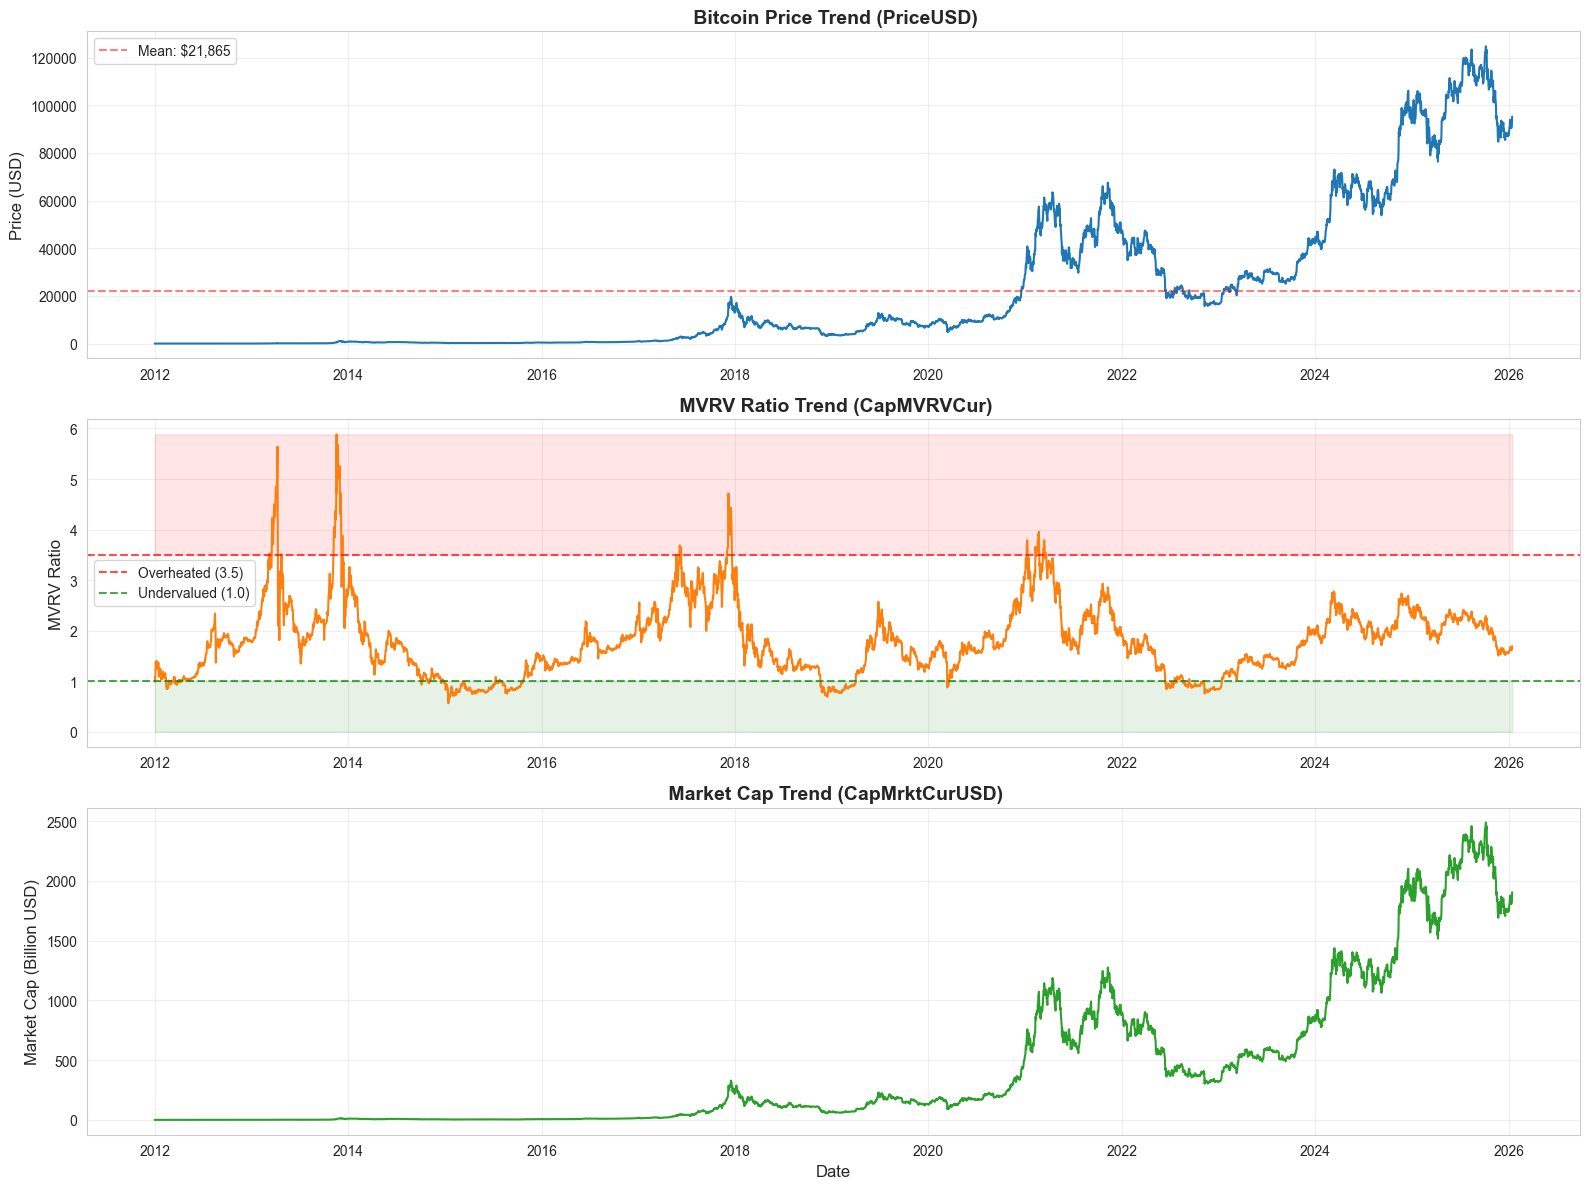

In [19]:
# 1. Price and valuation chart
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# PriceUSD
if 'PriceUSD' in btc_filtered.columns:
    ax = axes[0]
    ax.plot(btc_filtered.index, btc_filtered['PriceUSD'], linewidth=1.5, color='#1f77b4')
    ax.set_title(' Bitcoin Price Trend (PriceUSD)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Price (USD)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=btc_filtered['PriceUSD'].mean(), color='red', linestyle='--', alpha=0.5, label=f'Mean: ${btc_filtered["PriceUSD"].mean():,.0f}')
    ax.legend()

# CapMVRVCur
if 'CapMVRVCur' in btc_filtered.columns:
    ax = axes[1]
    mvrv_data = btc_filtered['CapMVRVCur'].dropna()
    ax.plot(mvrv_data.index, mvrv_data, linewidth=1.5, color='#ff7f0e')
    ax.axhline(y=3.5, color='red', linestyle='--', alpha=0.7, label='Overheated (3.5)')
    ax.axhline(y=1.0, color='green', linestyle='--', alpha=0.7, label='Undervalued (1.0)')
    ax.fill_between(mvrv_data.index, 0, 1.0, alpha=0.1, color='green')
    ax.fill_between(mvrv_data.index, 3.5, mvrv_data.max(), alpha=0.1, color='red')
    ax.set_title(' MVRV Ratio Trend (CapMVRVCur)', fontsize=14, fontweight='bold')
    ax.set_ylabel('MVRV Ratio', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()

# CapMrktCurUSD
if 'CapMrktCurUSD' in btc_filtered.columns:
    ax = axes[2]
    market_cap = btc_filtered['CapMrktCurUSD'].dropna() / 1e9  # billions
    ax.plot(market_cap.index, market_cap, linewidth=1.5, color='#2ca02c')
    ax.set_title(' Market Cap Trend (CapMrktCurUSD)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Market Cap (Billion USD)', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

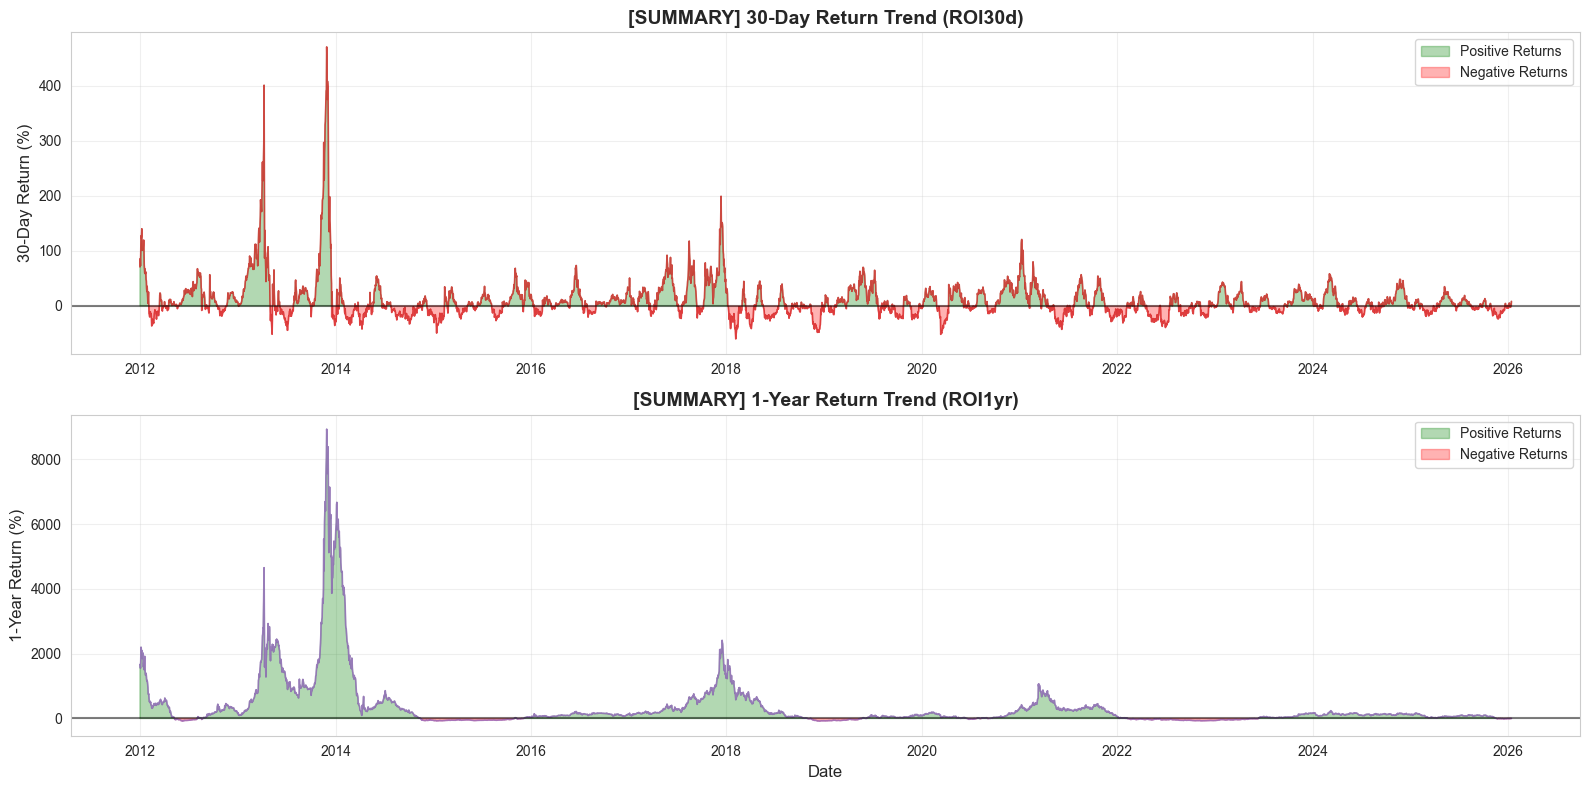

In [20]:
# 2. Return indicators
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# ROI30d
if 'ROI30d' in btc_filtered.columns:
    ax = axes[0]
    roi30 = btc_filtered['ROI30d'].dropna()
    ax.plot(roi30.index, roi30, linewidth=1.2, color='#d62728', alpha=0.8)
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax.fill_between(roi30.index, 0, roi30, where=(roi30 > 0), alpha=0.3, color='green', label='Positive Returns')
    ax.fill_between(roi30.index, 0, roi30, where=(roi30 <= 0), alpha=0.3, color='red', label='Negative Returns')
    ax.set_title('[SUMMARY] 30-Day Return Trend (ROI30d)', fontsize=14, fontweight='bold')
    ax.set_ylabel('30-Day Return (%)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()

# ROI1yr
if 'ROI1yr' in btc_filtered.columns:
    ax = axes[1]
    roi1yr = btc_filtered['ROI1yr'].dropna()
    ax.plot(roi1yr.index, roi1yr, linewidth=1.2, color='#9467bd', alpha=0.8)
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax.fill_between(roi1yr.index, 0, roi1yr, where=(roi1yr > 0), alpha=0.3, color='green', label='Positive Returns')
    ax.fill_between(roi1yr.index, 0, roi1yr, where=(roi1yr <= 0), alpha=0.3, color='red', label='Negative Returns')
    ax.set_title('[SUMMARY] 1-Year Return Trend (ROI1yr)', fontsize=14, fontweight='bold')
    ax.set_ylabel('1-Year Return (%)', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

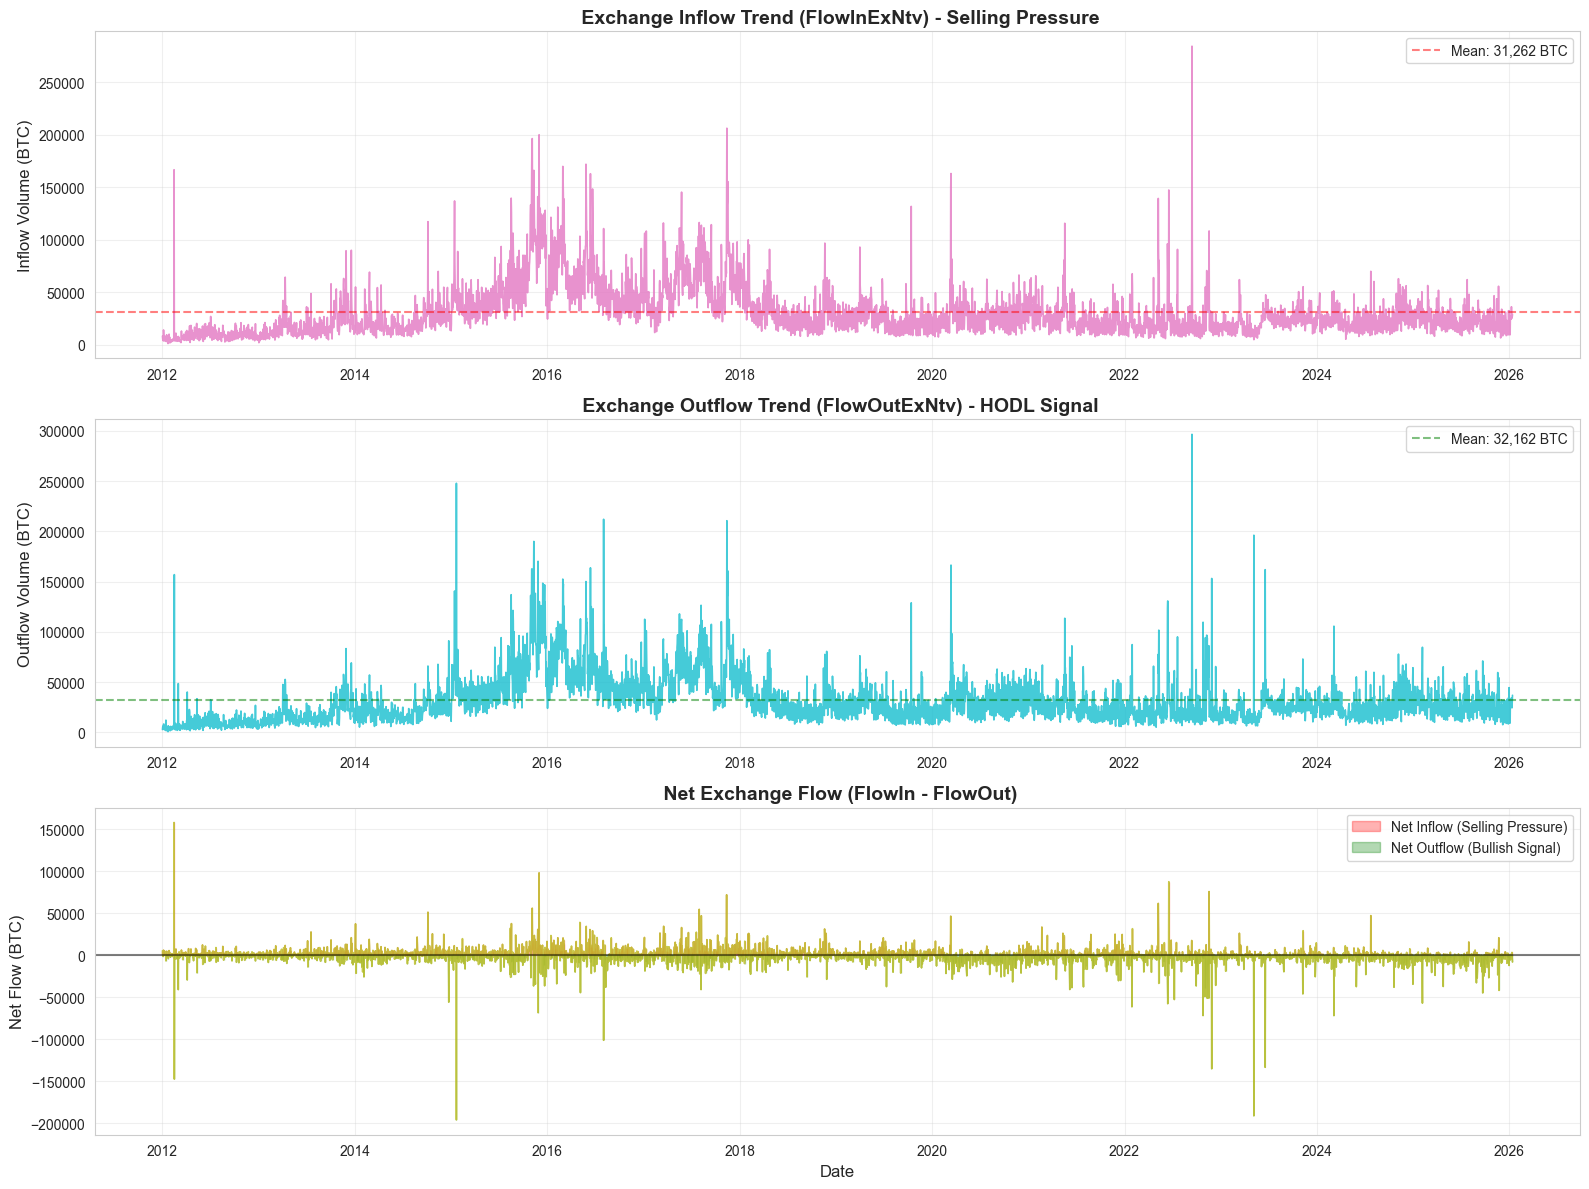

In [21]:
# 3. Exchange flows (selling/buying pressure)
if 'FlowInExNtv' in btc_filtered.columns and 'FlowOutExNtv' in btc_filtered.columns:
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    
    # FlowInExNtv (exchange inflow)
    ax = axes[0]
    flow_in = btc_filtered['FlowInExNtv'].dropna()
    ax.plot(flow_in.index, flow_in, linewidth=1.2, color='#e377c2', alpha=0.8)
    ax.set_title(' Exchange Inflow Trend (FlowInExNtv) - Selling Pressure', fontsize=14, fontweight='bold')
    ax.set_ylabel('Inflow Volume (BTC)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=flow_in.mean(), color='red', linestyle='--', alpha=0.5, label=f'Mean: {flow_in.mean():,.0f} BTC')
    ax.legend()
    
    # FlowOutExNtv (exchange outflow)
    ax = axes[1]
    flow_out = btc_filtered['FlowOutExNtv'].dropna()
    ax.plot(flow_out.index, flow_out, linewidth=1.2, color='#17becf', alpha=0.8)
    ax.set_title(' Exchange Outflow Trend (FlowOutExNtv) - HODL Signal', fontsize=14, fontweight='bold')
    ax.set_ylabel('Outflow Volume (BTC)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=flow_out.mean(), color='green', linestyle='--', alpha=0.5, label=f'Mean: {flow_out.mean():,.0f} BTC')
    ax.legend()
    
    # Net Flow
    ax = axes[2]
    net_flow = flow_in - flow_out
    ax.plot(net_flow.index, net_flow, linewidth=1.2, color='#bcbd22', alpha=0.8)
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax.fill_between(net_flow.index, 0, net_flow, where=(net_flow > 0), alpha=0.3, color='red', label='Net Inflow (Selling Pressure)')
    ax.fill_between(net_flow.index, 0, net_flow, where=(net_flow <= 0), alpha=0.3, color='green', label='Net Outflow (Bullish Signal)')
    ax.set_title(' Net Exchange Flow (FlowIn - FlowOut)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Net Flow (BTC)', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("Exchange flow data not available.")

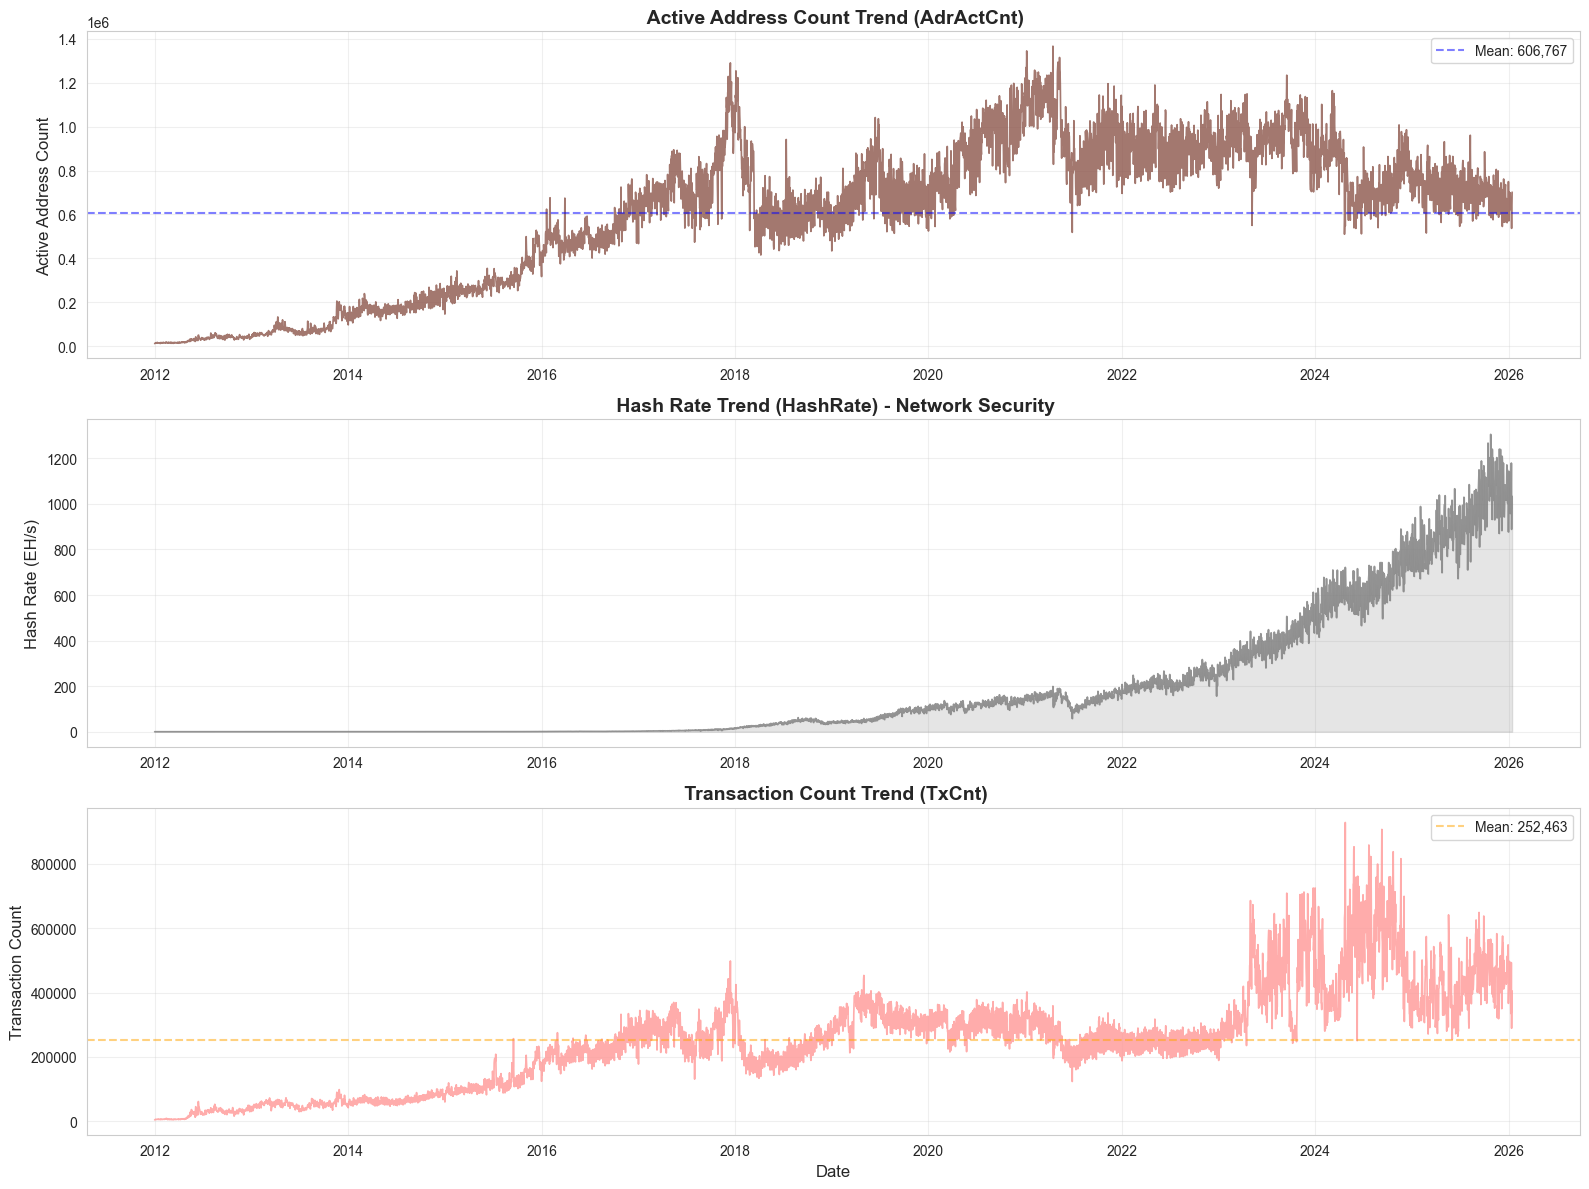

In [22]:
# 4. Network indicators (activity and security)
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# AdrActCnt (active address count)
if 'AdrActCnt' in btc_filtered.columns:
    ax = axes[0]
    addr_count = btc_filtered['AdrActCnt'].dropna()
    ax.plot(addr_count.index, addr_count, linewidth=1.2, color='#8c564b', alpha=0.8)
    ax.set_title(' Active Address Count Trend (AdrActCnt)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Active Address Count', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=addr_count.mean(), color='blue', linestyle='--', alpha=0.5, label=f'Mean: {addr_count.mean():,.0f}')
    ax.legend()

# HashRate
if 'HashRate' in btc_filtered.columns:
    ax = axes[1]
    hashrate = btc_filtered['HashRate'].dropna() / 1e6  # Convert to EH/s
    ax.plot(hashrate.index, hashrate, linewidth=1.2, color='#7f7f7f', alpha=0.8)
    ax.set_title(' Hash Rate Trend (HashRate) - Network Security', fontsize=14, fontweight='bold')
    ax.set_ylabel('Hash Rate (EH/s)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.fill_between(hashrate.index, 0, hashrate, alpha=0.2, color='gray')

# TxCnt (transaction count)
if 'TxCnt' in btc_filtered.columns:
    ax = axes[2]
    tx_count = btc_filtered['TxCnt'].dropna()
    ax.plot(tx_count.index, tx_count, linewidth=1.2, color='#ff9896', alpha=0.8)
    ax.set_title(' Transaction Count Trend (TxCnt)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Transaction Count', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=tx_count.mean(), color='orange', linestyle='--', alpha=0.5, label=f'Mean: {tx_count.mean():,.0f}')
    ax.legend()

plt.tight_layout()
plt.show()

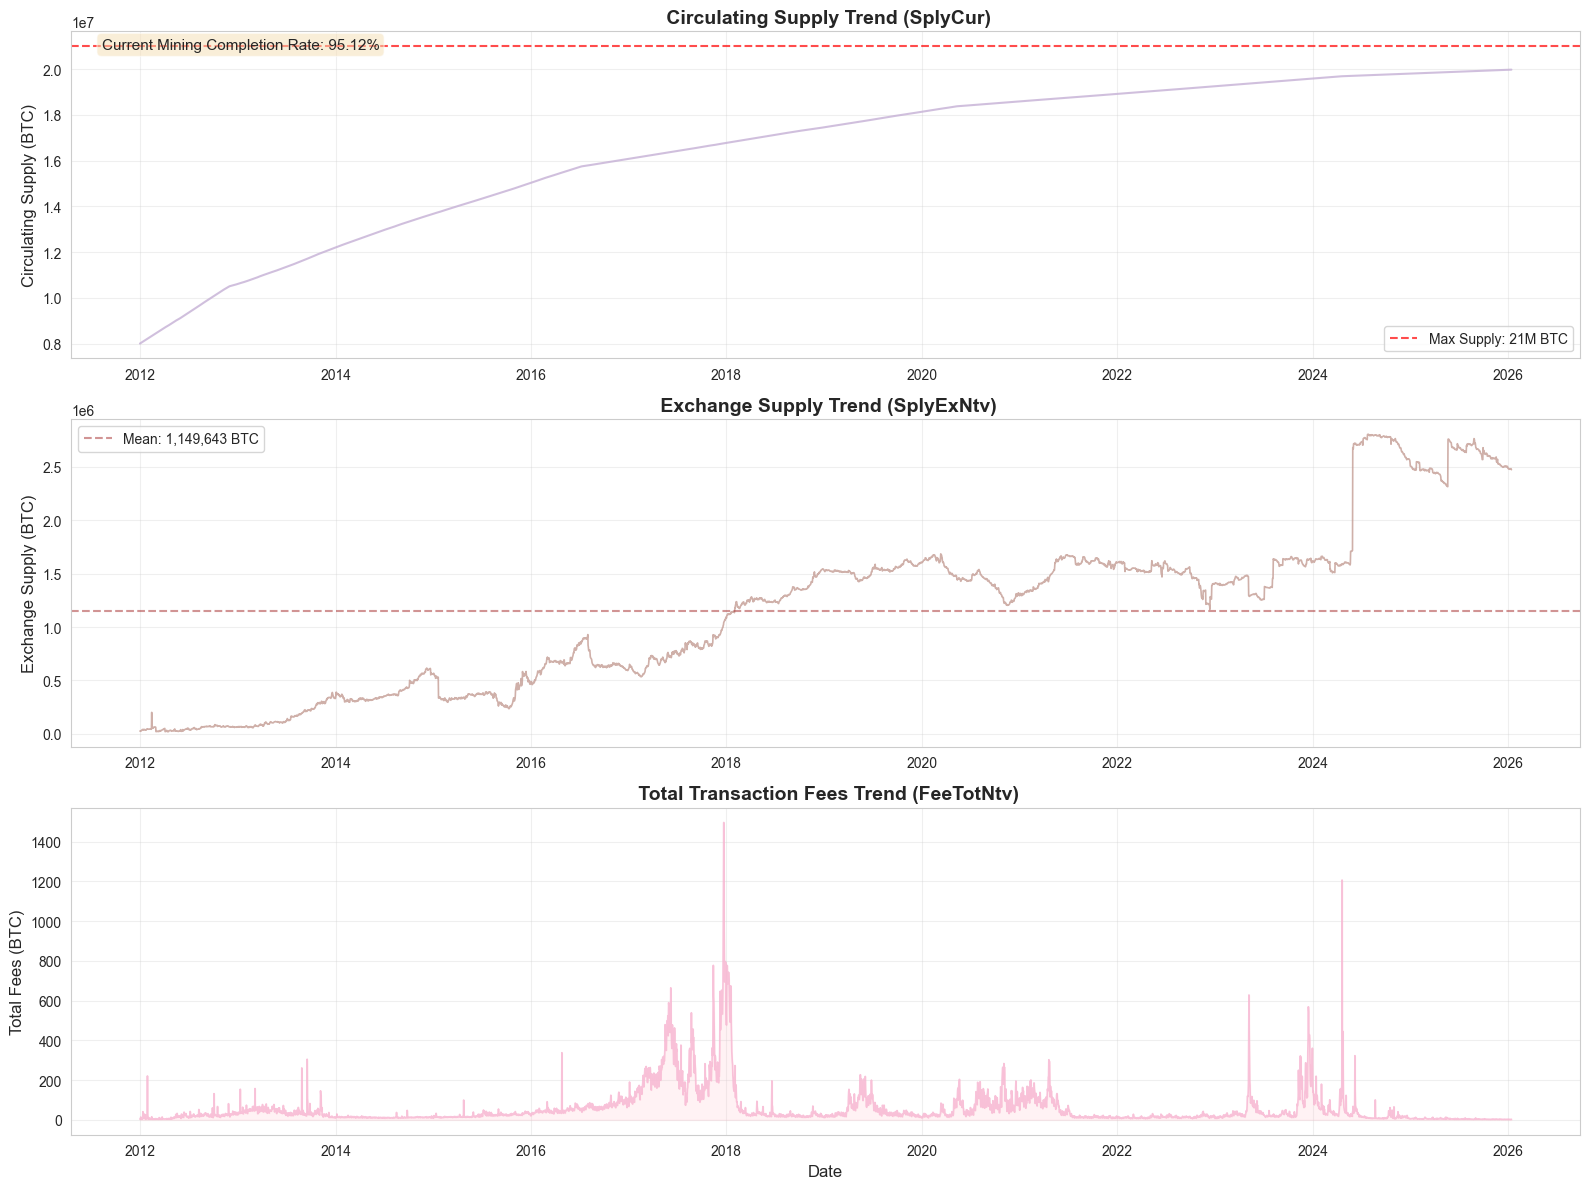

In [23]:
# 5. Supply indicators
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# SplyCur (circulating supply)
if 'SplyCur' in btc_filtered.columns:
    ax = axes[0]
    supply = btc_filtered['SplyCur'].dropna()
    ax.plot(supply.index, supply, linewidth=1.5, color='#c5b0d5', alpha=0.8)
    ax.axhline(y=21_000_000, color='red', linestyle='--', alpha=0.7, label='Max Supply: 21M BTC')
    ax.set_title(' Circulating Supply Trend (SplyCur)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Circulating Supply (BTC)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()
    # Show mining completion rate
    completion = (supply.iloc[-1] / 21_000_000) * 100
    ax.text(0.02, 0.98, f'Current Mining Completion Rate: {completion:.2f}%', 
            transform=ax.transAxes, fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# SplyExNtv (exchange supply)
if 'SplyExNtv' in btc_filtered.columns:
    ax = axes[1]
    ex_supply = btc_filtered['SplyExNtv'].dropna()
    ax.plot(ex_supply.index, ex_supply, linewidth=1.2, color='#c49c94', alpha=0.8)
    ax.set_title(' Exchange Supply Trend (SplyExNtv)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Exchange Supply (BTC)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=ex_supply.mean(), color='brown', linestyle='--', alpha=0.5, label=f'Mean: {ex_supply.mean():,.0f} BTC')
    ax.legend()

# FeeTotNtv (total fees)
if 'FeeTotNtv' in btc_filtered.columns:
    ax = axes[2]
    fees = btc_filtered['FeeTotNtv'].dropna()
    ax.plot(fees.index, fees, linewidth=1.2, color='#f7b6d2', alpha=0.8)
    ax.set_title(' Total Transaction Fees Trend (FeeTotNtv)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Total Fees (BTC)', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.fill_between(fees.index, 0, fees, alpha=0.2, color='pink')

plt.tight_layout()
plt.show()

**Time Series Trend Analysis Summary (2012-2026):**

From the above charts, the following long-term trends can be identified:

1. **Price (PriceUSD)**: Long-term uptrend with periodic bull/bear market cycles
2. **MVRV**: Enables identification of market cycles through overheated/oversold periods
3. **Returns (ROI)**: High volatility but positive returns prevail long-term
4. **Exchange Flows**: Net flow direction shows correlation with price trends
5. **Hash Rate**: Continuous uptrend = Network security strengthened
6. **Active Addresses**: Growing network adoption, positive correlation with price
7. **Circulating Supply**: Linear growth toward 21M BTC target by 2140
8. **Exchange Supply**: Variable but recent downtrend (HODL signal increasing)

 **Modeling Insight**: Using data since 2012 includes all halving cycles (2012, 2016, 2020, 2024) for building more robust models.

---

## 11. Polymarket Prediction Market Data Analysis

Polymarket is a decentralized prediction market platform that reflects the collective intelligence of market participants regarding Bitcoin-related events.

### 11.1 Load and Understand Polymarket Data Structure

In [24]:
# Check Polymarket data files
import os


def _infer_epoch_unit(series: pl.Series) -> str:
    v = series.drop_nulls().cast(pl.Int64)[0]
    if v < 10 ** 11:
        return "s"
    if v < 10 ** 14:
        return "ms"
    if v < 10 ** 17:
        return "us"
    return "ns"

def fix_epoch_cols(df: pl.DataFrame, cols: list[str]) -> pl.DataFrame:
    unit = _infer_epoch_unit(df.select(cols[0]).to_series())
    return df.with_columns(
        [pl.from_epoch(pl.col(c).cast(pl.Int64), time_unit=unit).alias(c) for c in cols]
    )


polymarket_files = list(POLYMARKET_DIR.glob("*.parquet"))
print(f"Number of Polymarket data files: {len(polymarket_files)}\n")

# Print info for each file
for file in sorted(polymarket_files):
    size_mb = file.stat().st_size / (1024 * 1024)
    print(f" {file.name:40s} - {size_mb:8.2f} MB")

# Load and check each file
polymarket_data = {}
for file in polymarket_files:
    try:
        df = pl.read_parquet(file)
        name = file.stem

        # If timestamp columns are stored as epoch numbers, convert to datetime.
        # "first_trade", "last_trade", timestamp
        time_cols = [
            c for c in df.columns
            if any(x in c.lower() for x in ["timestamp", "trade", "created_at", "end_date", "time", "date","first_trade","last_trade"])
        ]
        # epoch_cols = [
        #     c for c in time_cols
        #     if df[c].dtype in (
        #         pl.Int8, pl.Int16, pl.Int32, pl.Int64,
        #         pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64,
        #         pl.Float32, pl.Float64,
        #     )
        # ]
        if time_cols:
            df = fix_epoch_cols(df, time_cols)

        polymarket_data[name] = df

        print(f"\n {name}:")
        print(f"   - Shape: {df.shape}")
        print(f"   - Columns: {', '.join(df.columns[:5])}..." if len(df.columns) > 5 else f"   - Columns: {', '.join(df.columns)}")
    except Exception as e:
        print(f"\n {file.name}: Load failed - {e}")

Number of Polymarket data files: 8

 finance_politics_event_stats.parquet     -     1.37 MB
 finance_politics_markets.parquet         -     3.22 MB
 finance_politics_odds_history.parquet    -    16.96 MB
 finance_politics_summary.parquet         -     4.31 MB
 finance_politics_tokens.parquet          -     9.87 MB
 finance_politics_trades.parquet          -  3156.20 MB
 polymarket_daily_by_market.parquet       -     1.18 MB
 polymarket_master.parquet                -    28.75 MB

 finance_politics_event_stats:
   - Shape: (44033, 5)
   - Columns: event_slug, market_count, total_volume, first_market_start, last_market_end

 finance_politics_markets:
   - Shape: (78321, 10)
   - Columns: market_id, question, slug, event_slug, category...

 finance_politics_odds_history:
   - Shape: (2143181, 4)
   - Columns: market_id, token_id, timestamp, price

 finance_politics_summary:
   - Shape: (78321, 9)
   - Columns: market_id, question, slug, volume, active...

 finance_politics_tokens:
   - Sh

### 11.2 Markets Data Analysis (Market Information)

In [25]:
# Analyze markets data
# Find data with 'markets' in filename
markets_key = next((key for key in polymarket_data.keys() if 'markets' in key.lower()), None)

if markets_key:
    markets = polymarket_data[markets_key]
    print("=" * 100)
    print(f"[SUMMARY] Polymarket Markets Data Structure (File: {markets_key})")
    print("=" * 100)
    print(f"Total Markets: {len(markets):,}")
    print(f"\nColumn List:")
    for i, col in enumerate(markets.columns, 1):
        dtype = markets[col].dtype
        null_count = markets[col].null_count()
        print(f"  {i:2d}. {col:30s} - {str(dtype):15s} (Missing: {null_count:,})")
    
    # Filter Bitcoin-related markets
    if 'question' in markets.columns:
        btc_keywords = ['bitcoin', 'btc', 'crypto', 'cryptocurrency']
        btc_markets = markets.filter(
            pl.col('question').str.to_lowercase().str.contains('bitcoin|btc')
        )
        print(f"\n Bitcoin-Related Markets: {len(btc_markets):,}")
        
        # Show sample markets
        if len(btc_markets) > 0:
            print("\n Bitcoin-Related Market Examples (Latest 5):")
            sample_cols = [col for col in ['question', 'slug', 'category', 'volume'] if col in btc_markets.columns]
            print(btc_markets.select(sample_cols).head(5).to_pandas().to_string(index=False))
else:
    print(f" Markets data not found.")
    print(f"   Available keys: {list(polymarket_data.keys())}")

[SUMMARY] Polymarket Markets Data Structure (File: finance_politics_markets)
Total Markets: 78,321

Column List:
   1. market_id                      - String          (Missing: 0)
   2. question                       - String          (Missing: 0)
   3. slug                           - String          (Missing: 0)
   4. event_slug                     - String          (Missing: 0)
   5. category                       - String          (Missing: 0)
   6. volume                         - Float64         (Missing: 0)
   7. active                         - Boolean         (Missing: 0)
   8. closed                         - Boolean         (Missing: 0)
   9. created_at                     - Datetime(time_unit='us', time_zone=None) (Missing: 0)
  10. end_date                       - Datetime(time_unit='us', time_zone=None) (Missing: 535)

 Bitcoin-Related Markets: 21,921

 Bitcoin-Related Market Examples (Latest 5):
                                                                           

### 11.3 Odds Data Analysis (Probability Over Time)

In [26]:
# Analyze odds data (time series probability changes)
# Search for key with 'odds' or 'history'
odds_key = next((key for key in polymarket_data.keys() if 'odds' in key.lower() or 'history' in key.lower()), None)

if odds_key:
    odds = polymarket_data[odds_key]
    print("=" * 100)
    print(f" Polymarket Odds Data (Probability Over Time) - {odds_key}")
    print("=" * 100)
    print(f"Total Records: {len(odds):,}")
    print(f"\nColumn List:")
    for i, col in enumerate(odds.columns, 1):
        dtype = odds[col].dtype
        null_count = odds[col].null_count()
        print(f"  {i:2d}. {col:30s} - {str(dtype):15s} (Missing: {null_count:,})")
    
    # Basic statistics
    if 'price' in odds.columns:
        print("\n[SUMMARY] Odds Price Statistics:")
        print(odds.select('price').describe().to_pandas().to_string(index=False))
    
    # Check date range
    date_cols = [col for col in odds.columns if 'time' in col.lower() or 'date' in col.lower()]
    if date_cols:
        print(f"\n Data Date Range:")
        for date_col in date_cols[:2]:
            try:
                print(f"  - {date_col}: {odds[date_col].min()} ~ {odds[date_col].max()}")
            except:
                pass
else:
    print(f" Odds data not found.")
    print(f"   Available keys: {list(polymarket_data.keys())}")

 Polymarket Odds Data (Probability Over Time) - finance_politics_odds_history
Total Records: 2,143,181

Column List:
   1. market_id                      - String          (Missing: 0)
   2. token_id                       - String          (Missing: 0)
   3. timestamp                      - Datetime(time_unit='ms', time_zone=None) (Missing: 0)
   4. price                          - Float64         (Missing: 0)

[SUMMARY] Odds Price Statistics:
 statistic        price
     count 2.143181e+06
null_count 0.000000e+00
      mean 5.000062e-01
       std 3.909961e-01
       min 5.000000e-04
       25% 6.750000e-02
       50% 5.000000e-01
       75% 9.325000e-01
       max 1.000000e+00

 Data Date Range:
  - timestamp: 2023-01-24 00:00:12 ~ 2026-01-05 01:02:10


### 11.4 Trades Data Analysis (Trade Activity)

In [27]:
# Analyze trades data
trades_key = next((key for key in polymarket_data.keys() if 'trades' in key.lower()), None)

if trades_key:
    trades = polymarket_data[trades_key]
    print("=" * 100)
    print(f" Polymarket Trades Data (Transaction Details) - {trades_key}")
    print("=" * 100)
    print(f"Total Trades: {len(trades):,}")
    print(f"\nColumn List:")
    for i, col in enumerate(trades.columns, 1):
        dtype = trades[col].dtype
        null_count = trades[col].null_count()
        print(f"  {i:2d}. {col:30s} - {str(dtype):15s} (Missing: {null_count:,})")
    
    # Trade amount statistics
    value_cols = [col for col in trades.columns if 'value' in col.lower() or 'amount' in col.lower() or 'size' in col.lower() or 'price' in col.lower()]
    if value_cols:
        print(f"\n[SUMMARY] Trade Amount Statistics:")
        for col in value_cols[:3]:
            try:
                stats = trades.select(col).describe()
                print(f"\n  {col}:")
                print(f"    - Mean: {trades[col].mean():,.2f}")
                print(f"    - Median: {trades[col].median():,.2f}")
                print(f"    - Total: {trades[col].sum():,.2f}")
            except:
                pass
else:
    print(f" Trades data not found.")
    print(f"   Available keys: {list(polymarket_data.keys())}")

 Trades data not found.
   Available keys: ['finance_politics_event_stats', 'finance_politics_markets', 'finance_politics_odds_history', 'finance_politics_summary', 'finance_politics_tokens', 'polymarket_daily_by_market', 'polymarket_master']


### 11.5 Bitcoin-Related Market Sentiment Analysis

In [28]:
# Aggregate probability trends for Bitcoin-related markets
markets_key = next((key for key in polymarket_data.keys() if 'markets' in key.lower()), None)
odds_key = next((key for key in polymarket_data.keys() if 'odds' in key.lower() or 'history' in key.lower()), None)

if markets_key and odds_key:
    markets = polymarket_data[markets_key]
    odds = polymarket_data[odds_key]
    
    # Filter Bitcoin-related markets
    if 'question' in markets.columns:
        btc_markets = markets.filter(
            pl.col('question').str.to_lowercase().str.contains('bitcoin|btc')
        )
        
        if len(btc_markets) > 0 and 'market_id' in btc_markets.columns and 'market_id' in odds.columns:
            btc_market_ids = btc_markets['market_id'].unique().to_list()
            
            # Filter odds for Bitcoin-related markets
            btc_odds = odds.filter(pl.col('market_id').is_in(btc_market_ids))
            
            print("=" * 100)
            print(" Bitcoin-Related Prediction Market Sentiment Indicators")
            print("=" * 100)
            print(f"Bitcoin-Related Markets: {len(btc_markets):,}")
            print(f"Bitcoin-Related Odds Records: {len(btc_odds):,}")
            
            # Calculate daily average probability
            if 'price' in btc_odds.columns and len(btc_odds) > 0:
                # Find timestamp column
                time_col = None
                for col in btc_odds.columns:
                    if 'time' in col.lower() and btc_odds[col].dtype == pl.Datetime:
                        time_col = col
                        break
                
                if time_col:
                    # Calculate daily average probability
                    daily_sentiment = btc_odds.with_columns(
                        pl.col(time_col).cast(pl.Date).alias('date')
                    ).group_by('date').agg([
                        pl.col('price').mean().alias('avg_probability'),
                        pl.col('price').count().alias('record_count')
                    ]).sort('date')
                    
                    print(f"\n[SUMMARY] Daily Average Probability Statistics:")
                    print(f"  - Overall Mean: {daily_sentiment['avg_probability'].mean():.4f}")
                    print(f"  - Max: {daily_sentiment['avg_probability'].max():.4f}")
                    print(f"  - Min: {daily_sentiment['avg_probability'].min():.4f}")
                    print(f"\nSentiment Indicators for Latest 5 Days:")
                    print(daily_sentiment.tail(5).to_pandas().to_string(index=False))
                    
                    # Save for later use
                    btc_sentiment_daily = daily_sentiment.to_pandas()
                    btc_sentiment_daily.set_index('date', inplace=True)
                else:
                    print("\n Timestamp column not found.")
            else:
                print("\n Price column missing or data is empty.")
        else:
            print(" No Bitcoin-related markets found or market_id column missing.")
    else:
        print(" Question column not found.")
else:
    print(" Markets or odds data not found.")

 Bitcoin-Related Prediction Market Sentiment Indicators
Bitcoin-Related Markets: 21,921
Bitcoin-Related Odds Records: 202,033

[SUMMARY] Daily Average Probability Statistics:
  - Overall Mean: 0.5001
  - Max: 0.5050
  - Min: 0.4998

Sentiment Indicators for Latest 5 Days:
      date  avg_probability  record_count
2026-01-01              0.5           144
2026-01-02              0.5            66
2026-01-03              0.5            64
2026-01-04              0.5            64
2026-01-05              0.5           128


### 11.6 Polymarket Sentiment Indicator Visualization

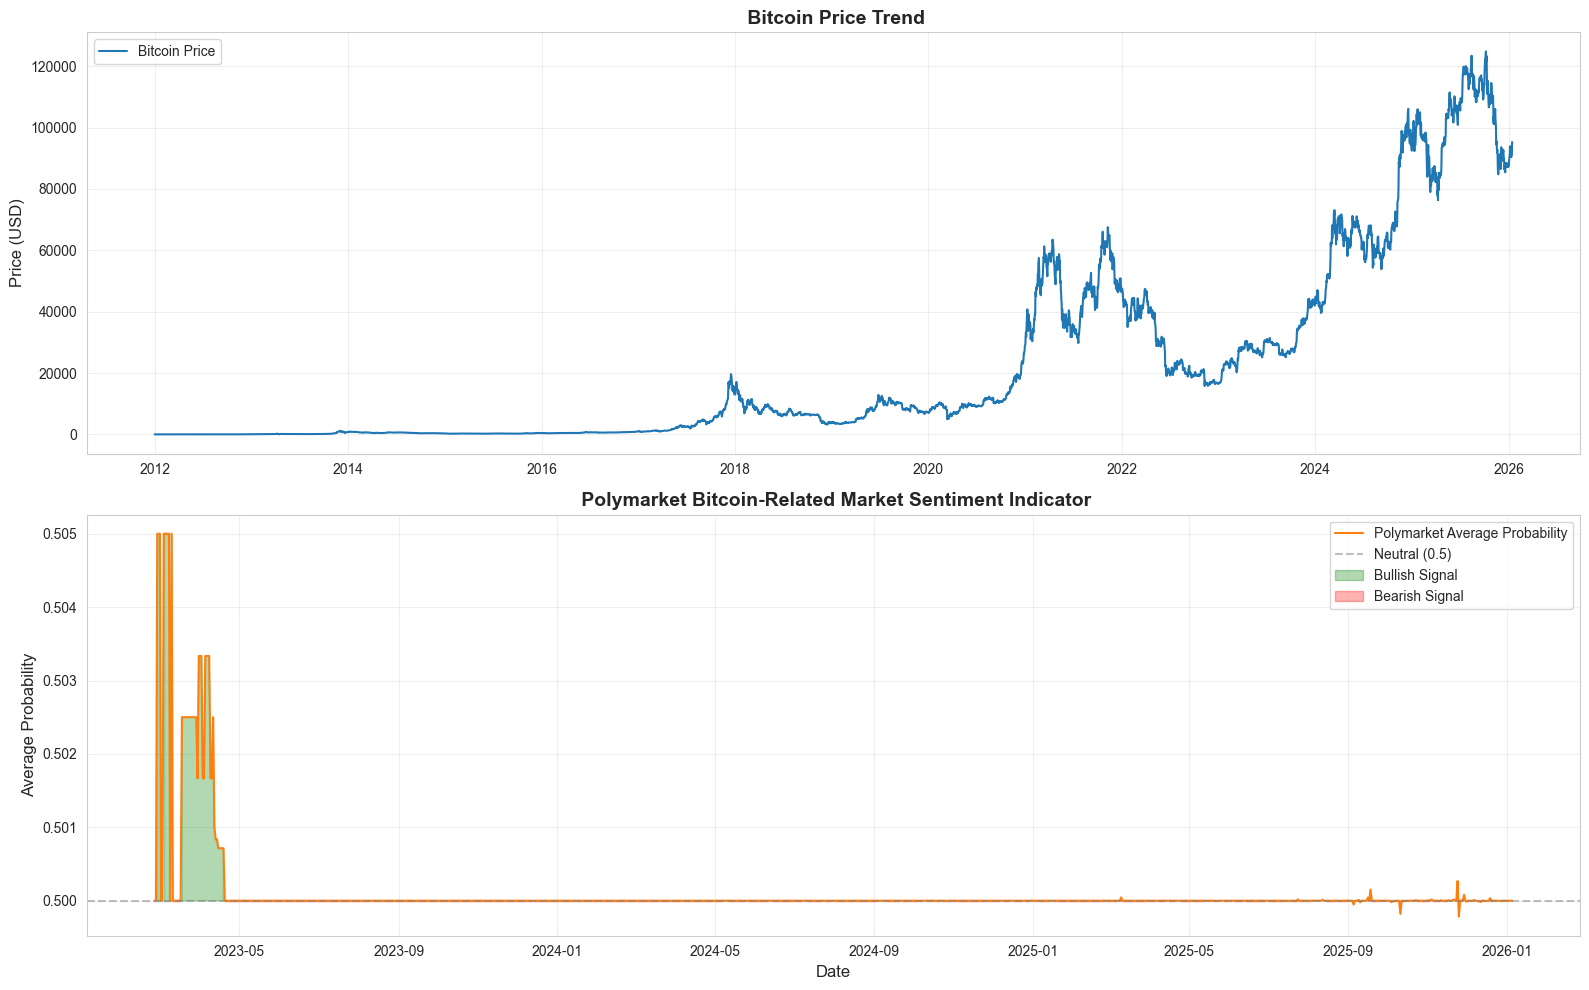


[SUMMARY] Bitcoin Price vs Polymarket Sentiment Correlation: -0.2418
    Weak Correlation


In [29]:
# Compare Polymarket sentiment indicators with Bitcoin price
if 'btc_sentiment_daily' in locals() and len(btc_sentiment_daily) > 0:
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Bitcoin price (since 2012)
    ax1 = axes[0]
    btc_price = btc_filtered['PriceUSD'].dropna()
    ax1.plot(btc_price.index, btc_price, linewidth=1.5, color='#1f77b4', label='Bitcoin Price')
    ax1.set_title(' Bitcoin Price Trend', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Price (USD)', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Polymarket sentiment indicator
    ax2 = axes[1]
    ax2.plot(btc_sentiment_daily.index, btc_sentiment_daily['avg_probability'], 
             linewidth=1.5, color='#ff7f0e', label='Polymarket Average Probability')
    ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Neutral (0.5)')
    ax2.fill_between(btc_sentiment_daily.index, 0.5, btc_sentiment_daily['avg_probability'], 
                     where=(btc_sentiment_daily['avg_probability'] > 0.5), 
                     alpha=0.3, color='green', label='Bullish Signal')
    ax2.fill_between(btc_sentiment_daily.index, 0.5, btc_sentiment_daily['avg_probability'], 
                     where=(btc_sentiment_daily['avg_probability'] <= 0.5), 
                     alpha=0.3, color='red', label='Bearish Signal')
    ax2.set_title(' Polymarket Bitcoin-Related Market Sentiment Indicator', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Average Probability', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Correlation analysis
    # Merge by date
    merged_data = btc_price.to_frame('price').join(btc_sentiment_daily['avg_probability'], how='inner')
    if len(merged_data) > 10:
        correlation = merged_data['price'].corr(merged_data['avg_probability'])
        print(f"\n[SUMMARY] Bitcoin Price vs Polymarket Sentiment Correlation: {correlation:.4f}")
        if abs(correlation) > 0.5:
            print("    Strong Correlation")
        elif abs(correlation) > 0.3:
            print("    Moderate Correlation")
        else:
            print("    Weak Correlation")
    else:
        print("\n Not enough merged data to calculate correlation.")
else:
    print(" btc_sentiment_daily variable not created. Run previous cell first.")

**Polymarket Analysis Summary:**

1. **Data Structure**: Various tables including Markets (market info), Odds (probability trends), Trades (transaction details)
2. **Bitcoin-Related Markets**: Filter markets with 'bitcoin' or 'btc' keywords in questions
3. **Sentiment Indicator**: Aggregate daily average probabilities to measure market participants' expectations about Bitcoin
4. **Price Correlation**: Analyze correlation between Polymarket sentiment and actual Bitcoin price

 **Modeling Application Ideas:**
- Use Polymarket sentiment as auxiliary feature for DCA strategy
- Probability > 0.5 (bullish prediction) → Increase purchase weight
- Probability < 0.5 (bearish prediction) → Decrease purchase weight
- Already used in Example 1 model with 20% weight

---

## 12. Feature Classification Guide for Modeling

### [SUMMARY] Overall Data Strategy: Organized into 5 Categories

###  **1) Price · Valuation (Core of Cores)**
**Role:** "Is it expensive or cheap right now?"

**Columns:** `PriceUSD`, `CapMVRVCur`, `CapMrktCurUSD`, `ROI30d`, `ROI1yr`

**Why Important?**
- Ultimate goal of all predictions is price increase/decrease
- MVRV (Market Value / Realized Value): Evaluate current profit/loss status
- ROI Indicators: Short/medium-term profitability trends

###  **2) Network Activity (Fundamentals)**
**Role:** "Are people actually using Bitcoin?"

**Columns:** `AdrActCnt`, `AdrBalCnt`, `TxCnt`, `TxTfrCnt`, `BlkCnt`, `FeeTotNtv`

**Why Important?**
- Actual usage supporting price increases
- Lack of network activity = Risk of price bubble
- Together with mining difficulty, determines system health

###  **3) Exchange Capital Flows (Supply/Demand = VERY IMPORTANT)**
**Role:** "Is money flowing in or out?"

**Columns:** `FlowInExNtv/USD`, `FlowOutExNtv/USD`, `SplyExNtv/USD`, `volume_reported_spot_usd_1d`

**Why Important?**
- **Most sensitive indicator to short-term price movements**
- Large capital flowing to exchanges → Selling signal
- Large capital leaving exchanges → HODL reinforcement signal

###  **4) Supply · Mining · Security (Long-Term Trust)**
**Role:** "Is the system stable?"

**Columns:** `HashRate`, `IssTotNtv`, `IssTotUSD`, `SplyCur`, `SplyExpFut10yr`

**Why Important?**
- HashRate: Mining network strength (51% attack resistance)
- Supply: Maintaining scarcity
- Long-term trust = Long-term profitability

###  **5) Quality/Disposal (Exclude from Analysis)**
**Exclusion Reasons:**
- `CapMrktEstUSD`: String type (cannot be used for numeric analysis)
- `PriceBTC`: Always 1 (no variance, no information)
- `ReferenceRate*`: High missing values (80%+)
- `Asset*Time`: Data metadata (not needed for model input)

In [30]:
# 12.1 Feature classification and data quality validation

feature_categories = {
    "1) Price·Valuation (Core)": {
        "columns": ["PriceUSD", "CapMVRVCur", "CapMrktCurUSD", "ROI30d", "ROI1yr"],
        "importance": "***** (Top Priority)",
        "usage": "Model target and key input variables"
    },
    "2) Network Activity (Fundamentals)": {
        "columns": ["AdrActCnt", "AdrBalCnt", "TxCnt", "TxTfrCnt", "BlkCnt", "FeeTotNtv"],
        "importance": "**** (Very Important)",
        "usage": "Price increase 'backing' indicator"
    },
    "3) Exchange Capital Flows (Supply/Demand)": {
        "columns": ["FlowInExNtv", "FlowInExUSD", "FlowOutExNtv", "FlowOutExUSD", "SplyExNtv", "SplyExUSD", "volume_reported_spot_usd_1d"],
        "importance": "***** (Short-Term Signals)",
        "usage": "Most sensitive to short-term price movements"
    },
    "4) Supply·Mining·Security (Trust)": {
        "columns": ["HashRate", "IssTotNtv", "IssTotUSD", "SplyCur", "SplyExpFut10yr"],
        "importance": "*** (Long-Term Trust)",
        "usage": "System stability and scarcity validation"
    },
    "5) Disposal (Exclude)": {
        "columns": ["CapMrktEstUSD", "PriceBTC", "ReferenceRateUSD", "AssetCreateTime", "Asset_IssueTime"],
        "importance": " (Cannot use in model)",
        "usage": "Type error, fixed values, high missing, metadata"
    }
}

print("=" * 80)
print("[SUMMARY] Bitcoin Feature Taxonomy")
print("=" * 80)

total_selected = 0
for category, details in feature_categories.items():
    cols = details["columns"]
    available = [c for c in cols if c in btc_df.columns]
    missing = [c for c in cols if c not in btc_df.columns]
    
    print(f"\n{category}")
    print(f"  Importance: {details['importance']}")
    print(f"  Usage: {details['usage']}")
    print(f"  Selected Columns: {len(available)}/{len(cols)}")
    
    if available:
        print(f"     {', '.join(available)}")
    if missing:
        print(f"     Not Included: {', '.join(missing)}")
    
    if category != "5) Disposal (Exclude)":
        total_selected += len(available)

print("\n" + "=" * 80)
print(f" Total Selected Columns: {total_selected}")
print(f"  Excluded Columns: {len(feature_categories['5) Disposal (Exclude)']['columns'])}")
print(f"[SUMMARY] Available: {total_selected + len([c for c in feature_categories['5) Disposal (Exclude)']['columns'] if c in btc_df.columns])}/{len(btc_df.columns)}")
print("=" * 80)

[SUMMARY] Bitcoin Feature Taxonomy

1) Price·Valuation (Core)
  Importance: ***** (Top Priority)
  Usage: Model target and key input variables
  Selected Columns: 5/5
     PriceUSD, CapMVRVCur, CapMrktCurUSD, ROI30d, ROI1yr

2) Network Activity (Fundamentals)
  Importance: **** (Very Important)
  Usage: Price increase 'backing' indicator
  Selected Columns: 6/6
     AdrActCnt, AdrBalCnt, TxCnt, TxTfrCnt, BlkCnt, FeeTotNtv

3) Exchange Capital Flows (Supply/Demand)
  Importance: ***** (Short-Term Signals)
  Usage: Most sensitive to short-term price movements
  Selected Columns: 7/7
     FlowInExNtv, FlowInExUSD, FlowOutExNtv, FlowOutExUSD, SplyExNtv, SplyExUSD, volume_reported_spot_usd_1d

4) Supply·Mining·Security (Trust)
  Importance: *** (Long-Term Trust)
  Usage: System stability and scarcity validation
  Selected Columns: 5/5
     HashRate, IssTotNtv, IssTotUSD, SplyCur, SplyExpFut10yr

5) Disposal (Exclude)
  Importance:  (Cannot use in model)
  Usage: Type error, fixed values, hi

In [31]:
# 12.2 Data quality analysis by category and time series usability

print("\n" + "=" * 80)
print(" Data Quality Analysis by Category (2012-01-01 ~ 2025-12-31)")
print("=" * 80)

# Feature categories for analysis (exclude disposal)
model_features = {
    "1) Price·Valuation": ["PriceUSD", "CapMVRVCur", "CapMrktCurUSD", "ROI30d", "ROI1yr"],
    "2) Network Activity": ["AdrActCnt", "AdrBalCnt", "TxCnt", "TxTfrCnt", "BlkCnt", "FeeTotNtv"],
    "3) Exchange Flows": ["FlowInExNtv", "FlowInExUSD", "FlowOutExNtv", "FlowOutExUSD", "SplyExNtv", "SplyExUSD", "volume_reported_spot_usd_1d"],
    "4) Supply·Mining·Security": ["HashRate", "IssTotNtv", "IssTotUSD", "SplyCur", "SplyExpFut10yr"]
}

for category, cols in model_features.items():
    print(f"\n{category}")
    print("-" * 80)
    
    total_null = 0
    null_info = []
    
    for col in cols:
        if col in btc_df.columns:
            null_count = btc_df[col].null_count()
            null_pct = (null_count / len(btc_df)) * 100
            total_null += null_count
            
            status = "" if null_pct < 1 else "" if null_pct < 10 else ""
            null_info.append(f"{status} {col:25} → {null_pct:5.2f}% missing")
    
    for info in null_info:
        print(f"  {info}")
    
    avg_null = total_null / len(cols) / len(btc_df) * 100
    print(f"  → Average Missing: {avg_null:.2f}%")

print("\n" + "=" * 80)
print(" Model Input Recommendations")
print("=" * 80)
print("""
 Priority (Must Use):
   1. 3) Exchange Flows → Short-term signals (highest daily volatility)
   2. 1) Price·Valuation → Target and contextual variables
   3. 4) Supply·Mining·Security → Reflects long-term trends

  Additional Considerations:
   - 2) Network Activity → For fundamental validation
   - Polymarket data (2024-2025) has limited timespan, may need time weighting

 Feature Engineering Ideas (See Section 10.6):
   - Flow Indicator: Net Flow = (FlowOut - FlowIn) → Selling pressure
   - Valuation: MVRV Z-Score = (MVRV - mean) / std → Normalization
   - Momentum: Price vs MA(30) ratio → Trend strength
   - Mining: HashRate change rate → Miner profitability change
""")
print("=" * 80)


 Data Quality Analysis by Category (2012-01-01 ~ 2025-12-31)

1) Price·Valuation
--------------------------------------------------------------------------------
   PriceUSD                  →  9.03% missing
   CapMVRVCur                →  9.03% missing
   CapMrktCurUSD             →  9.03% missing
   ROI30d                    →  9.52% missing
   ROI1yr                    → 14.90% missing
  → Average Missing: 10.30%

2) Network Activity
--------------------------------------------------------------------------------
   AdrActCnt                 →  0.02% missing
   AdrBalCnt                 →  0.02% missing
   TxCnt                     →  0.02% missing
   TxTfrCnt                  →  0.02% missing
   BlkCnt                    →  0.02% missing
   FeeTotNtv                 →  0.02% missing
  → Average Missing: 0.02%

3) Exchange Flows
--------------------------------------------------------------------------------
   FlowInExNtv               →  0.02% missing
   FlowInExUSD              